In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_lastest.csv')

In [3]:
df_ai.drop(columns=['Unnamed: 0'], inplace=True)
print(df_ai.shape)
df_ai.head()

(181299, 13)


url        date  \
0  http://businessnewsthisweek.com/business/infog...  2023-05-20   
1    https://allafrica.com/stories/202504250184.html  2025-04-25   
2  https://asiatimes.com/2023/07/yang-lan-intervi...  2023-07-25   
3  https://cdn.meritalk.com/articles/commerce-nom...  2025-02-04   
4  https://citylife.capetown/hmn/uncategorized/re...  2023-11-11   

                                         title_clean  \
0  Infogain AI Business Solutions Now Available i...   
1  Africa AI Policies in Africa - Lessons From Gh...   
2    Yang Lan interviews academics on AI development   
3  Commerce Nominee Promises Increased Domestic A...   
4  Revolutionizing the Manufacturing Industry The...   

                                          text_clean  topic  \
0  Infogain AI Business Solutions Now Available i...     53   
1  Africa AI Policies in Africa - Lessons From Gh...     93   
2  a link to a friend (Opens in new window)Click ...    261   
3  Details By Andrew Rice Feb 3, 2025 4 14 pm Com...     52   
4  Revolutionizing the Manufacturing Industry The...      5   

                  industry                                     Representation  \
0      Business & Startups  ['small', 'entrepreneurs', 'unlocking', 'ango'...   
1   Employment & Workforce  ['biontech', 'intellitek', 'founded', 'streaml...   
2               Technology  ['office', 'ordered', 'holiday', 'highlighted'...   
3      Government & Policy  ['biden', 'order', 'executive', 'safeguards', ...   
4  Finance & Stock Markets  ['usd', 'cagr', 'growth', 'projected', 'techna...   

  sentiment  sentiment_score  \
0  positive         0.968321   
1  positive         0.953480   
2  positive         0.863181   
3  positive         0.887693   
4  positive         0.960287   

                                                orgs  \
0  ['Infogain', 'Microsoft', 'Courtyard by Marrio...   
1                                      ['AllAfrica']   
2  ['Asia Times', 'ISIS', 'the Institute for AI I...   
3  ['Commerce', 'the Department of Commerce', 'th...   
4                                                 []   

                                              people  \
0  ['Dibyendu Bhattacharya', 'Sonu Sood s', 'Anub...   
1  ['My Account', 'My Account', 'Thompson Gyedu K...   
2  ['Yuval Noah Harari', 'Yang Lan', 'Hun Manet',...   
3  ['Andrew Rice', 'Howard Lutnick', 'Donald Trum...   
4                                ['Hla', 'tauj Xov']   

                                            products  \
0  ['Azure', 'Azure', 'Azure', 'Azure', 'Azure', ...   
1                                                 []   
2                                        ['ChatGPT']   
3                                                 []   
4                                                 []   

                                           locations  
0                        ['Los Gatos', 'California']  
1  ['Ghana', 'Rwanda', 'Ghana', 'Rwanda', 'Johann...  
2                           ['US', 'China', 'China']  
3                  ['America', 'America', 'America']  
4                                       ['Lub neej']

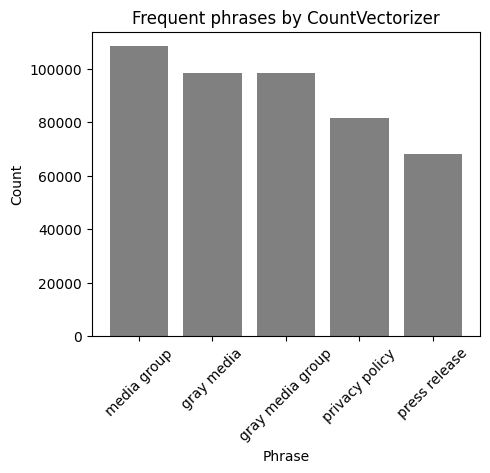

In [4]:
import matplotlib.pyplot as plt

# Data
phrases = ["media group", "gray media", "gray media group", "privacy policy", "press release"]
counts = [108485, 98479, 98479, 81454, 68278]

# Plot
plt.figure(figsize=(5, 4))
plt.bar(phrases, counts, color='gray')
plt.ylabel("Count")
plt.xlabel("Phrase")
plt.title("Frequent phrases by CountVectorizer" )
# plt.gca().invert_yaxis()
plt.gca() # Highest count at top
plt.tight_layout()


plt.xticks(rotation=45)
plt.show()

In [ ]:
df_ai['industry'].value_counts(normalize=True)

industry
Technology                 0.541989
Government & Policy        0.096333
Employment & Workforce     0.066696
Finance & Stock Markets    0.061308
Media & Entertainment      0.044865
Business & Startups        0.043497
Healthcare                 0.033067
Education                  0.029294
Automotive                 0.020033
Legal Services             0.017159
Marketing & Sales          0.015957
Cybersecurity              0.010000
Lifestyle & Family         0.009382
Energy & Environment       0.007568
Food & Restaurants         0.002852
Name: proportion, dtype: float64

## Sentiment

In [ ]:
df_ai['sentiment'].value_counts(normalize=True)

sentiment
positive    0.735034
negative    0.264966
Name: proportion, dtype: float64

In [ ]:
df_ai['sentiment_score'].describe()

count    181299.000000
mean          0.709929
std           0.324685
min           0.062598
25%           0.459456
50%           0.906359
75%           0.960748
max           0.972244
Name: sentiment_score, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

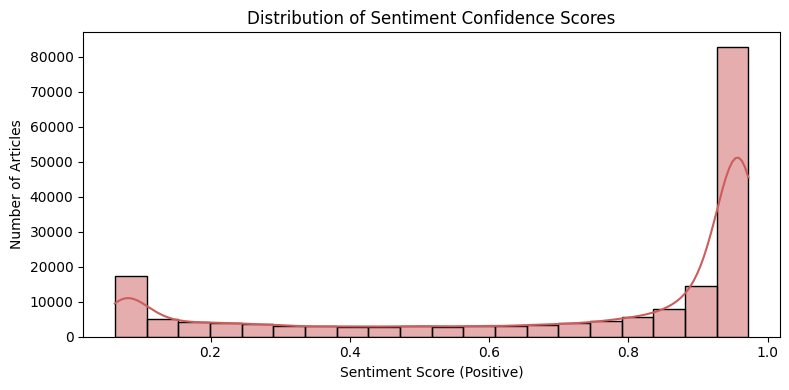

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_ai["sentiment_score"], bins=20, kde=True,color='indianred')
plt.title("Distribution of Sentiment Confidence Scores")
plt.xlabel("Sentiment Score (Positive)")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

<ipython-input-23-d2ea564c5631>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend = df_ai.groupby(pd.Grouper(key="date", freq="M"))["sentiment_score"].mean()


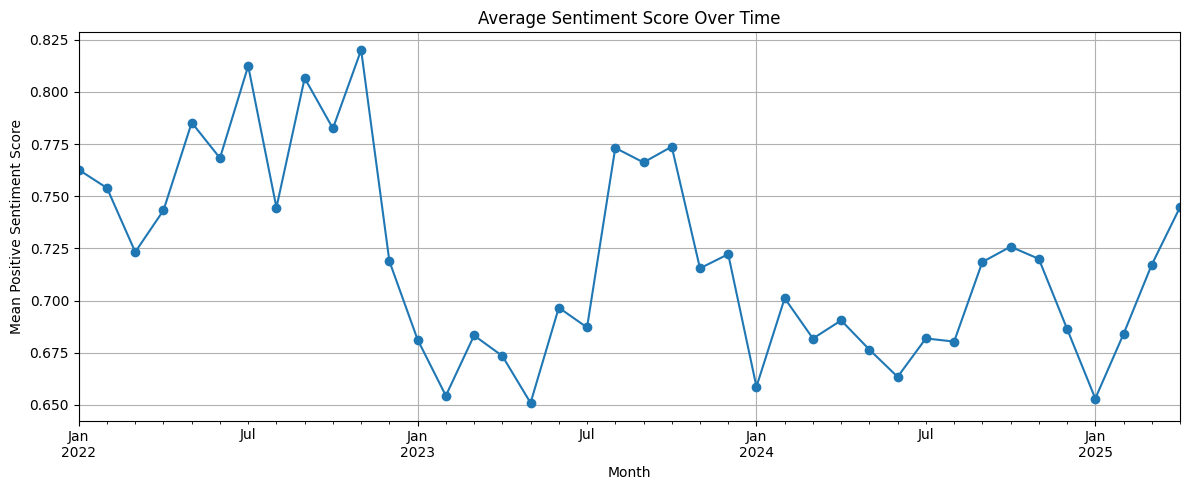

In [23]:
df_ai["date"] = pd.to_datetime(df_ai["date"])  # if you have a date column
trend = df_ai.groupby(pd.Grouper(key="date", freq="M"))["sentiment_score"].mean()

plt.figure(figsize=(12, 5))
trend.plot(marker="o")
plt.title("Average Sentiment Score Over Time")
plt.ylabel("Mean Positive Sentiment Score")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-18-825f32e47246>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ai[df_ai['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-18-825f32e47246>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ai[df_ai['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


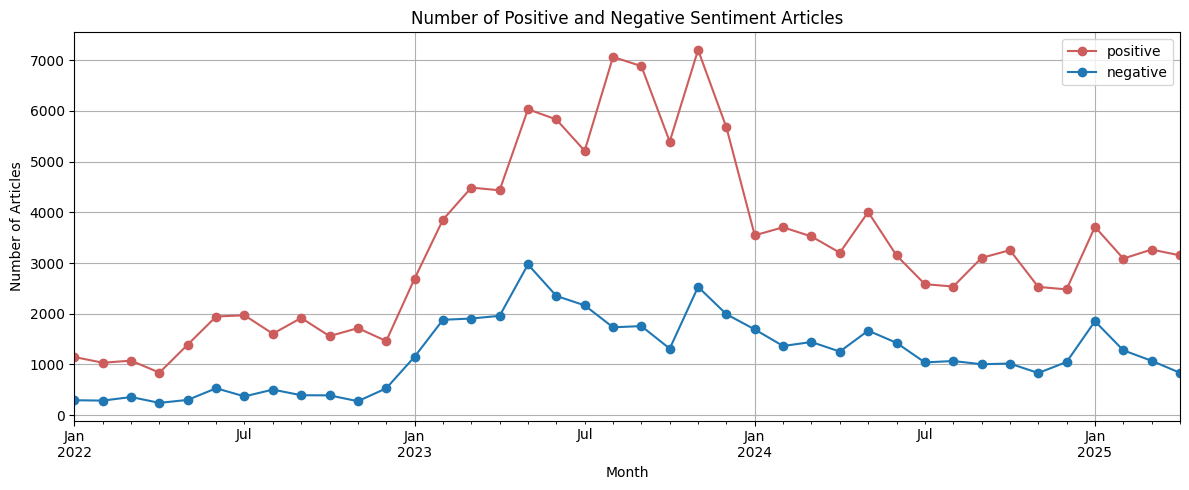

In [18]:
df_ai["date"] = pd.to_datetime(df_ai["date"])  # if you have a date column
trend_pos = df_ai[df_ai['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ai[df_ai['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-22-1863e5a7cf21>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-22-1863e5a7cf21>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ai.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


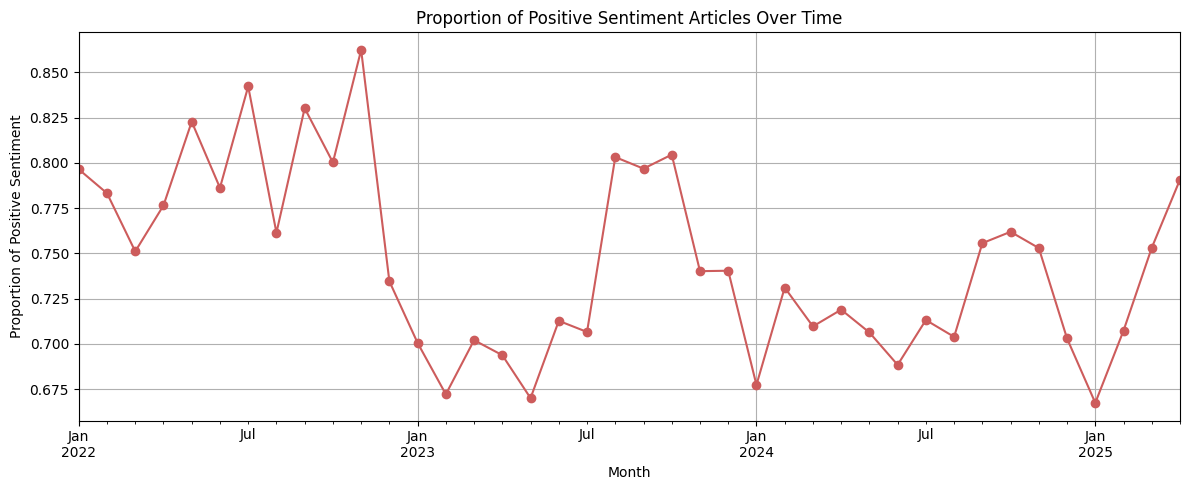

In [ ]:

trend = (
    df_ai[df_ai['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ai.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

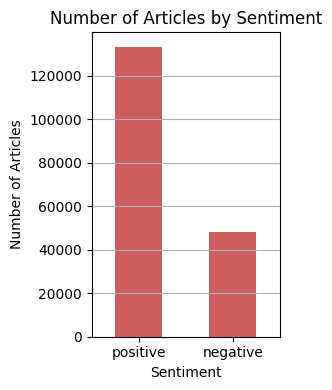

In [ ]:
sentiment_counts = df_ai['sentiment'].value_counts()

plt.figure(figsize=(3, 4))
sentiment_counts.plot(kind='bar', color='indianred')

plt.title("Number of Articles by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

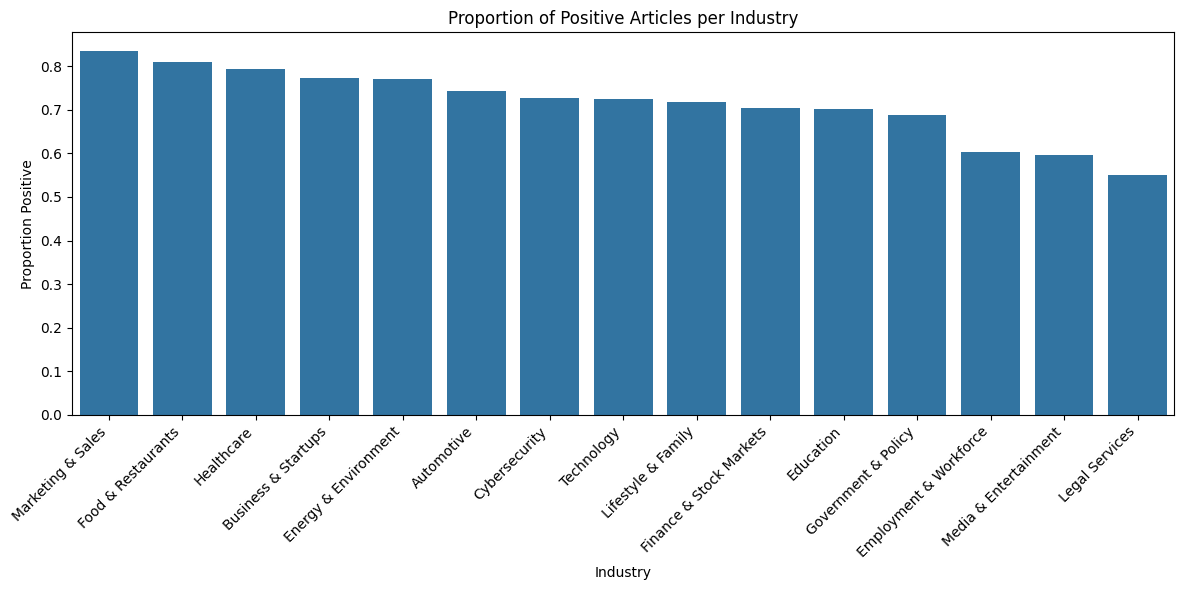

In [ ]:
industry_sentiment = df_ai.groupby("industry")["sentiment_score"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_sentiment.index, y=industry_sentiment.values)
plt.xticks(rotation=45, ha="right")
plt.title("Proportion of Positive Articles per Industry")
plt.ylabel("Proportion Positive")
plt.xlabel("Industry")
plt.tight_layout()
plt.show()

In [12]:
industry_sentiment

industry
Marketing & Sales          0.874870
Food & Restaurants         0.851064
Healthcare                 0.820017
Energy & Environment       0.802478
Business & Startups        0.798250
Automotive                 0.773403
Lifestyle & Family         0.764256
Cybersecurity              0.758963
Technology                 0.756182
Finance & Stock Markets    0.745389
Education                  0.730559
Government & Policy        0.711766
Employment & Workforce     0.598164
Media & Entertainment      0.584214
Legal Services             0.516876
Name: sentiment, dtype: float64

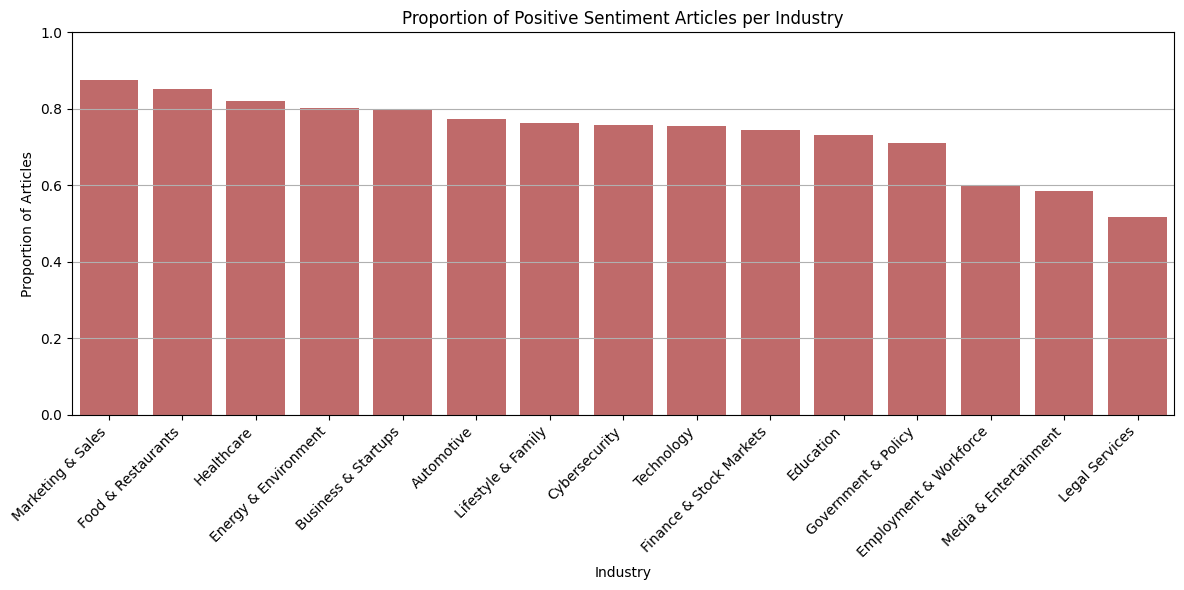

In [11]:
industry_total = df_ai.groupby("industry")["sentiment"].count()
industry_positive = df_ai[df_ai["sentiment"] == "positive"].groupby("industry")["sentiment"].count()
industry_sentiment = (industry_positive / industry_total).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=industry_sentiment.index, y=industry_sentiment.values, color="indianred")

plt.xticks(rotation=45, ha="right")
plt.title("Proportion of Positive Sentiment Articles per Industry")
plt.ylabel("Proportion of Articles")
plt.xlabel("Industry")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [20]:
df_top = df_ai['industry'].value_counts().reset_index().head(5)
df_ai_top = df_ai[df_ai['industry'].isin(df_top['industry'])]

In [21]:
df_ai_top.shape

(147068, 17)

<ipython-input-22-e05f4ee73f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_top["month"] = df_ai_top["date"].dt.to_period("M").dt.to_timestamp()


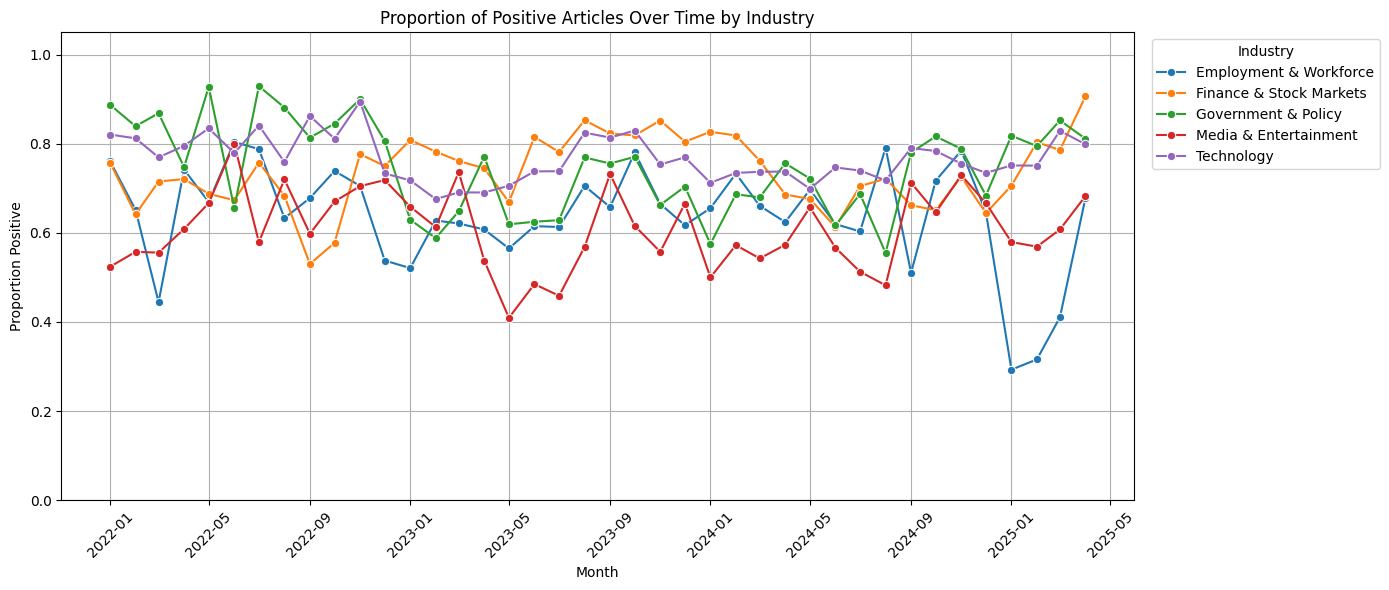

In [22]:
df_ai_top["month"] = df_ai_top["date"].dt.to_period("M").dt.to_timestamp()


# Calculate proportion of positive sentiment by industry per month
positive_counts = (
    df_ai_top[df_ai_top["sentiment"] == "positive"]
    .groupby(["month", "industry"])["sentiment"]
    .count()
    .rename("positive_count")
)

total_counts = (
    df_ai_top.groupby(["month", "industry"])["sentiment"]
    .count()
    .rename("total_count")
)

# Combine and compute proportion
trend_df = pd.concat([positive_counts, total_counts], axis=1).fillna(0)
trend_df["proportion_positive"] = trend_df["positive_count"] / trend_df["total_count"]

# Reset index for plotting
trend_df = trend_df.reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=trend_df,
    x="month",
    y="proportion_positive",
    hue="industry",
    marker="o"
)

plt.title("Proportion of Positive Articles Over Time by Industry")
plt.ylabel("Proportion Positive")
plt.xlabel("Month")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", title="Industry")
plt.tight_layout()
plt.grid(True)
plt.show()

<ipython-input-23-d4c202de7df7>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-23-d4c202de7df7>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


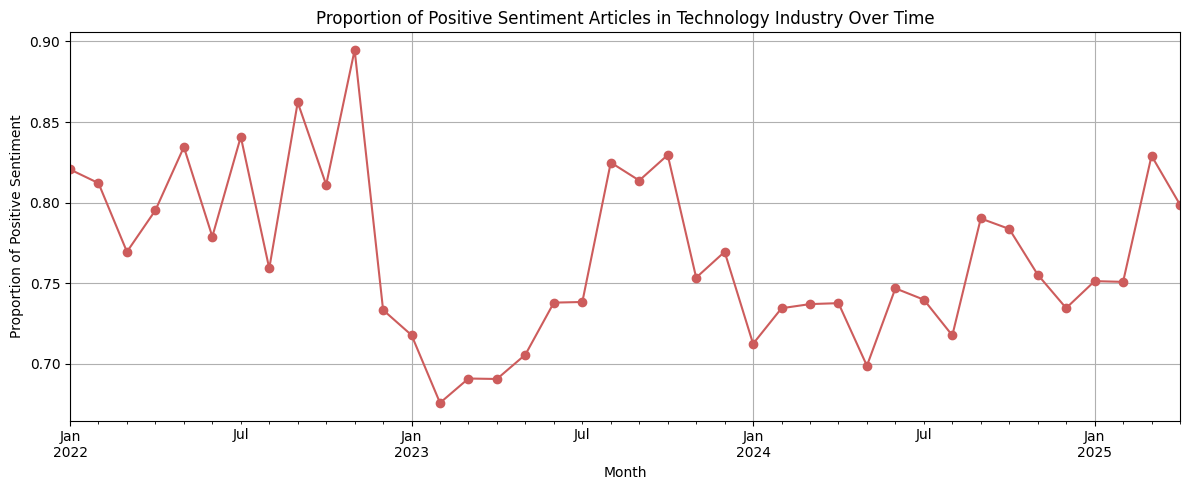

In [23]:
df_ind = df_ai[df_ai['industry']=='Technology']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Technology Industry Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-47-70b8c13c4253>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-47-70b8c13c4253>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


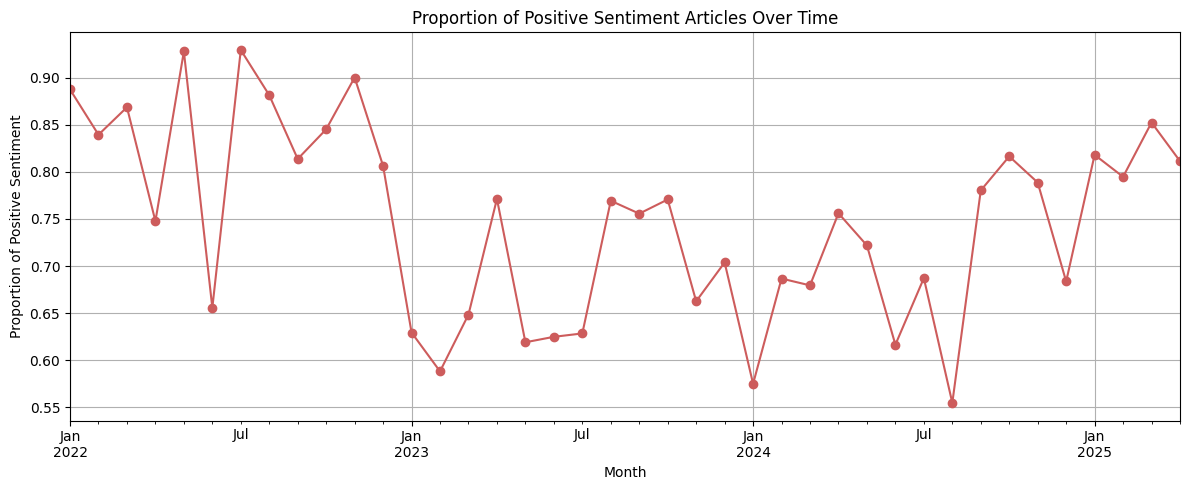

In [ ]:
df_ind = df_ai[df_ai['industry']=='Government & Policy']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-140-077959b48672>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-140-077959b48672>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


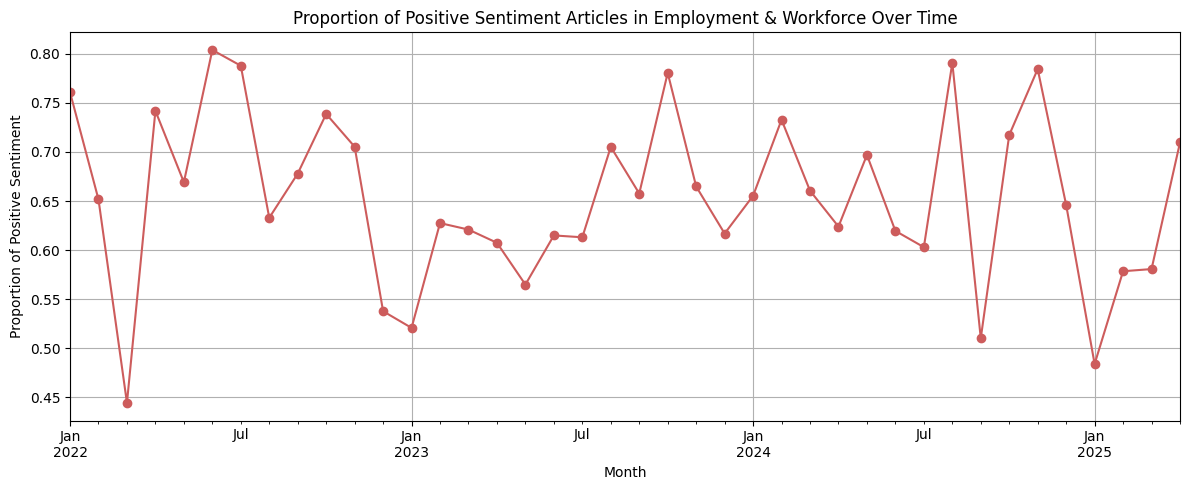

In [140]:
df_ind = df_ai[df_ai['industry']=='Employment & Workforce']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Employment & Workforce Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-141-fc73ff63827f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-141-fc73ff63827f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


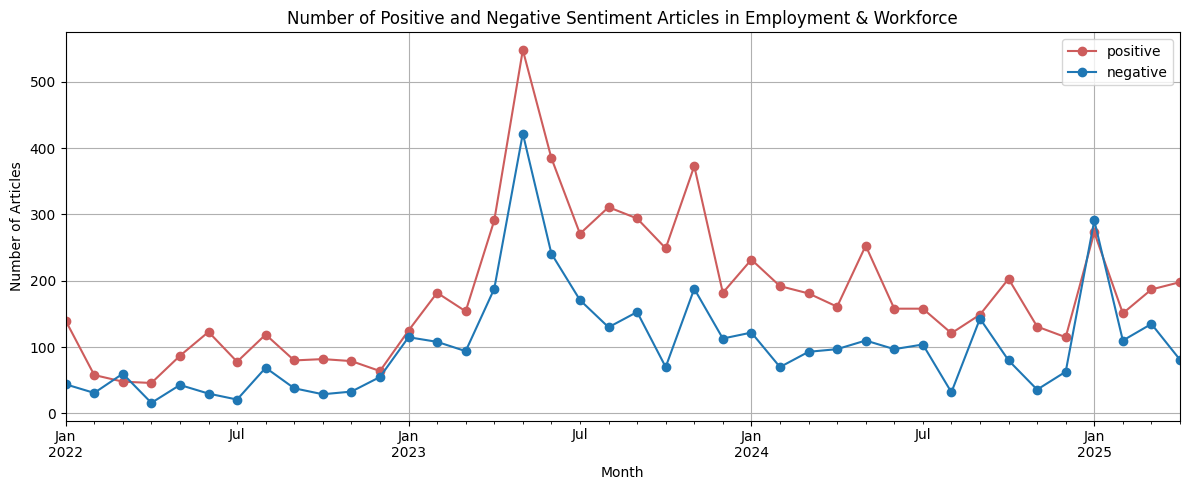

In [141]:
trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles in Employment & Workforce")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [156]:
df_ind[(df_ind['date']=='2024-01-15')&(df_ind['date']<='2024-01-31')].sample(10)

url  \
31243                              https://www.tbsnews.net/world/global-economy/artificial-intelligence-will-affect-almost-40-jobs-globally-imf-report-775074   
113267                                                                        https://california18.com/artificial-intelligence-would-affect-jobs/11974132024/   
115129  https://www.latestly.com/technology/tech-layoff-2024-google-confirms-firing-1000-people-in-recent-weeks-due-to-ai-reorganisation-over-7500-employe...   
27126                                                                       https://www.wgmd.com/baidu-denies-its-ai-chatbot-tied-to-china-military-research/   
8069                                     https://www.digitaljournal.com/world/imf-chief-says-ai-holds-risks-tremendous-opportunity-for-global-economy/article   
33411   https://www.dailymail.co.uk/wires/pa/article-12964207/Artificial-intelligence-affect-40-jobs-globally-warns-IMF.html?ns_mchannel=rss&ns_campaign=1...   
61894                                 https://www.breitbart.com/tech/2024/01/15/imf-chief-ai-will-impact-60-of-jobs-in-advanced-economies-like-united-states/   
12372                                                  https://www.lep.co.uk/lifestyle/tech/riding-the-momentum-what-awaits-the-ai-revolution-in-2024-4478344   
84996                          https://www.malaymail.com/news/money/2024/01/15/imf-chief-says-ai-holds-risks-tremendous-opportunity-for-global-economy/112461   
131859                                                      https://www.india.com/business/artificial-intelligence-to-affect-40-of-jobs-globally-imf-6656528/   

             date  \
31243  2024-01-15   
113267 2024-01-15   
115129 2024-01-15   
27126  2024-01-15   
8069   2024-01-15   
33411  2024-01-15   
61894  2024-01-15   
12372  2024-01-15   
84996  2024-01-15   
131859 2024-01-15   

                                                                                                                                                  title_clean  \
31243                                                                                  Artificial Intelligence will affect almost 40 jobs globally IMF report   
113267                                                                                                              Artificial intelligence would affect jobs   
115129  Tech Layoff 2024 Google Confirms Firing 1,000 People in Recent Weeks Due to AI Reorganisation, Over 7,500 Employees Fired in Early January 2024 by...   
27126                                                                                             Baidu Denies Its AI Chatbot Tied to China Military Research   
8069                                                                               IMF chief says AI holds risks, 'tremendous opportunity' for global economy   
33411                                                                                                       Artificial intelligence will affect 40 of jobs...   
61894                                                                            IMF Chief AI Will Impact 60 of Jobs in Advanced Economies Like United States   
12372                                                                                              Riding the momentum What awaits the AI revolution in 2024?   
84996                                                                                IMF chief says AI holds risks, tremendous opportunity for global economy   
131859                                                                                              Artificial Intelligence To Affect 40 Of Jobs Globally IMF   

                                                                                                                                                   text_clean  \
31243   TBS ChangeHealth MONDAY, JANUARY 15, 2024 Artificial Intelligence will affect almost 40 jobs globally IMF report Global Economy TBS Report 15 Janu...   
113267  News Artificial intelligence would affect jobs P

<Axes: xlabel='date'>

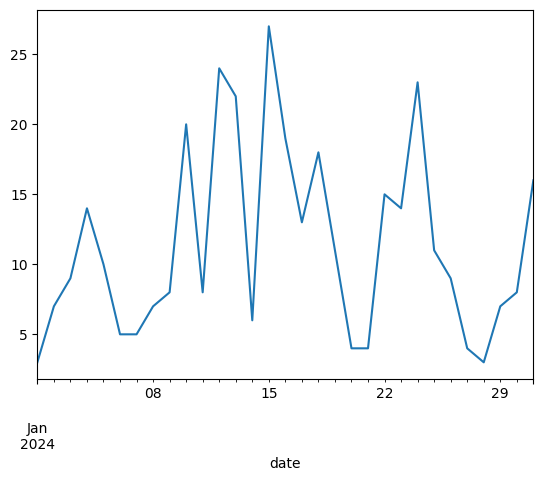

In [155]:
df_invest = df_ind[(df_ind['date']>='2024-01-01')&(df_ind['date']<='2024-01-31')]
df_invest.groupby('date')['sentiment'].count().plot(kind='line')

<ipython-input-80-9e32ad5ee453>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-80-9e32ad5ee453>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


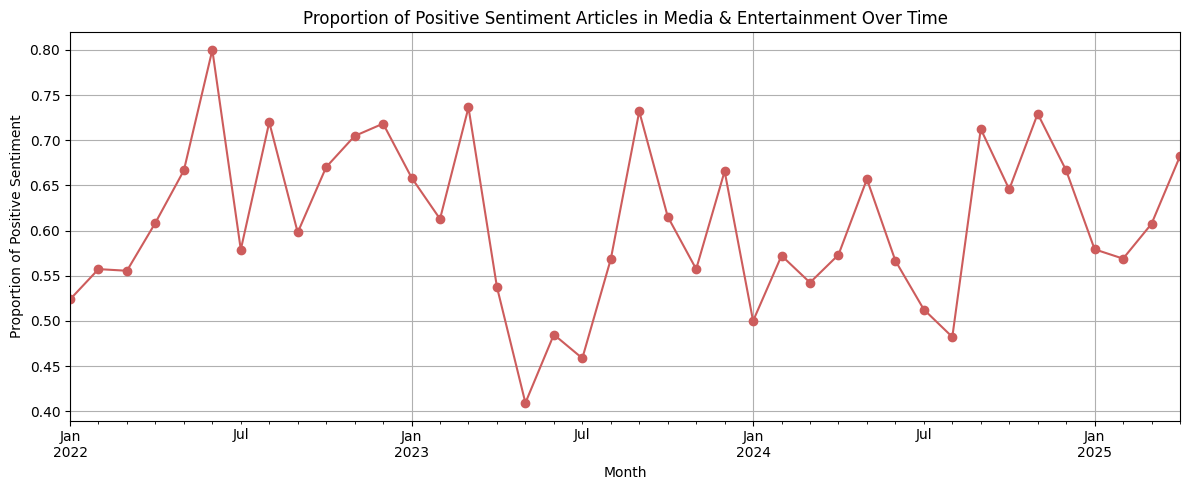

In [80]:
df_ind = df_ai[df_ai['industry']=='Media & Entertainment']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Media & Entertainment Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-81-1b555e7c3156>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-81-1b555e7c3156>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


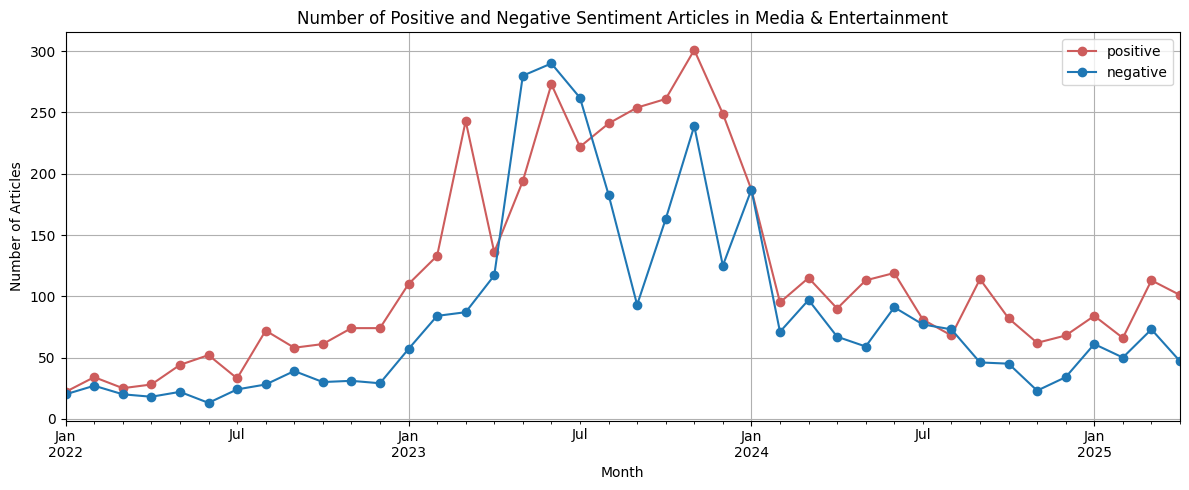

In [81]:
trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles in Media & Entertainment")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
df_ind[(df_ind['date']>='2023-05-01')&(df_ind['date']<='2024-05-31')].sample(10)

url       date  \
168364  https://www.dailybreeze.com/2023/05/26/regulat... 2023-05-26   
53215   https://www.mysuncoast.com/prnewswire/2023/10/... 2023-10-17   
143326  https://www.theguardian.com/culture/2023/apr/2... 2023-05-02   
138730  https://www.newschannel5.com/news/in-the-age-o... 2023-11-09   
171561  https://www.kget.com/national-news/ai-generate... 2023-11-17   
158499  https://www.bollywoodlife.com/webstories/news-... 2023-10-31   
124665  https://www.cbs7.com/prnewswire/2023/08/10/fut... 2023-08-10   
15838   https://www.kawc.org/npr-news/npr-news/2023-06... 2023-06-22   
157784  https://www.counton2.com/technology/ap-technol... 2024-01-11   
99846   https://www.actionnews5.com/2024/01/04/microso... 2024-01-04   

                                              title_clean  \
168364  Regulators take aim at AI to protect consumers...   
53215   Fotor's AI Magic Transforms Halloween Celebrat...   
143326  The Guide 84 Why movies made by artificial int...   
138730  Music producers learn how to create in the age...   
171561  AI-generated TikToks, YouTube videos push webs...   
158499  Halloween 2023 AI imagines Deepika Padukone, S...   
124665  FUTUREVERSE PUBLISHES RESEARCH PAPER REVEALING...   
15838   And the award goes to AI ft. humans the Grammy...   
157784  Tennessee governor, music leaders launch push ...   
99846   Microsoft adds AI button to keyboards to summo...   

                                               text_clean  topic  \
168364  News News Crime and Public Safety Investigativ...    207   
53215   ContestsNewsAs Seen On 7Saluting the SuncoastL...    119   
143326  jobsDigital ArchiveGuardian Puzzles appGuardia...     40   
138730  site Go Weather News Back to School Local News...     47   
171561  News Local News Crime Watch Guest Interviews S...    138   
158499  Halloween 2023 AI imagines Deepika Padukone, S...    119   
124665  PAPER REVEALING ITS BREAKTHROUGH TECHNOLOGY IN...     47   
15838   Our People CPB and FCC Compliance Jobs at KAWC...    167   
157784  News Video Center Local News Nation and World ...     47   
99846   Watch LiveShare Your PicsRecent VideoDownload ...    135   

                     industry  \
168364  Media & Entertainment   
53215   Media & Entertainment   
143326  Media & Entertainment   
138730  Media & Entertainment   
171561  Media & Entertainment   
158499  Media & Entertainment   
124665  Media & Entertainment   
15838   Media & Entertainment   
157784  Media & Entertainment   
99846   Media & Entertainment   

                                           Representation sentiment  \
168364  ['casablanca', 'screenwriters', 'pulse', 'eze'...  negative   
53215   ['artwork', 'dungeons', 'stop', 'franchise', '...  positive   
143326  ['bollywood', 'movie', 'viral', 'disney', 'seq...  negative   
138730  ['music', 'tennessee', 'licensing', 'coming', ...  positive   
171561  ['videos', 'tiktoks', 'nudes', 'veo', 'vidby',...  negative   
158499  ['artwork', 'dungeons', 'stop', 'franchise', '...  negative   
124665  ['music', 'tennessee', 'licensing', 'coming', ...  positive   
15838   ['contains', 'sparkcognition', 'shootings', 'd...  negative   
157784  ['music', 'tennessee', 'licensing', 'coming', ...  negative   
99846   ['key', 'tout', 'summon', 'approves', 'latitud...  positive   

        sentiment_score                                               orgs  \
168364         0.406134  ['Lakers Clippers', 'Dodgers', 'USC', 'Rams', ...   
53215          0.957193  ['UsABC7', 'ReleasesFotor', 'Fotor', 'Fotor', ...   
143326         0.178253                                                 []   
138730         0.782891  ['DCS', "Gideon's Army", 'NewsChannel 5', 'Tit...   
171561         0.072783  ['Automotive News', 'NFL', '49ers', 'Raiders',...   
158499         0.092186                                                 []   
124665         0.958649  ['Futureverse', 'Futureverse', 'Google', 'Face...   
15838          0.107469  ['KAWC', 'KAWC', 'KAWC', 'KOFA', 'Arizona Edi

<ipython-input-74-a00177924faf>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-74-a00177924faf>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


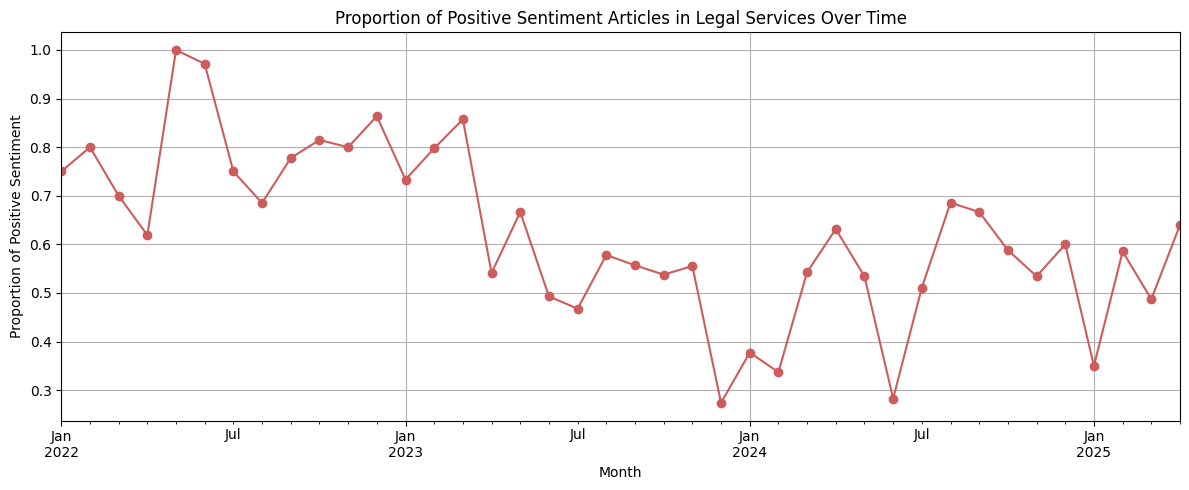

In [74]:
df_ind = df_ai[df_ai['industry']=='Legal Services']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Legal Services Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-75-2344a8f72b31>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-75-2344a8f72b31>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


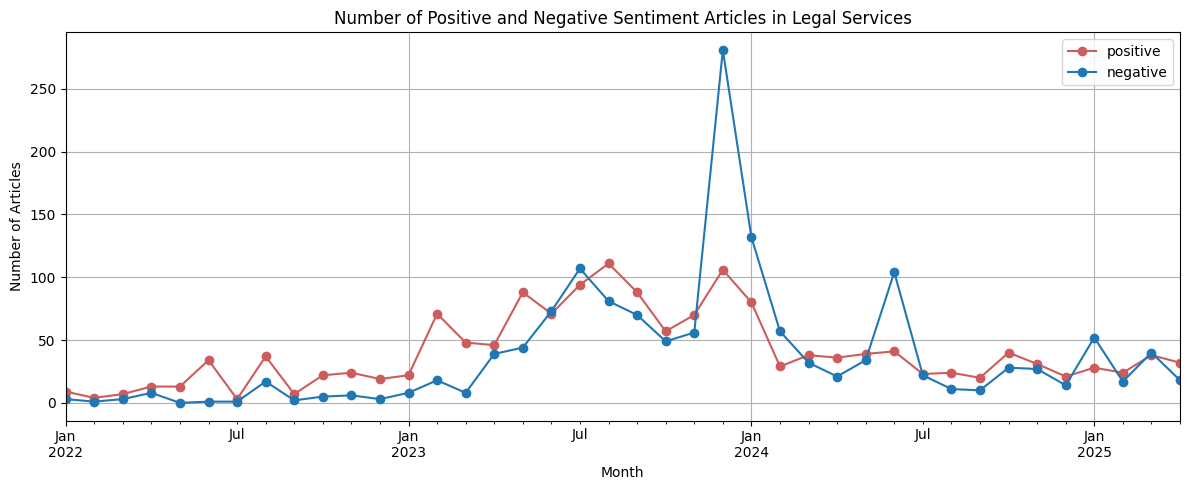

In [75]:
trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles in Legal Services")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
df_ai[(df_ai['industry']=='Legal Services')&(df_ai['date']>'2023-11-30')&(df_ai['date']<'2024-01-01')].sample(10)

url       date  \
34970   https://www.tag24.com/justice/new-york-times-s... 2023-12-27   
72538   https://www.kosu.org/top-stories-from-npr/2023... 2023-12-27   
21939   https://cw39.com/news/business/ap-business/ap-... 2023-12-27   
95681   https://www.hawaiipublicradio.org/2023-12-15/r... 2023-12-15   
158962  https://www.wistv.com/prnewswire/2023/12/14/se... 2023-12-14   
33636   https://www.nasdaq.com/articles/openai-microso... 2023-12-28   
24230   https://www.wibw.com/2023/12/27/new-york-times... 2023-12-27   
144884  https://www.news4jax.com/business/2023/12/06/b... 2023-12-06   
146229  https://www.wlrn.org/npr-breaking-news/2023-12... 2023-12-27   
379     https://techreport.com/news/new-york-times-fil... 2023-12-29   

                                              title_clean  \
34970   New York Times sues OpenAI and Microsoft in ma...   
72538   The New York Times sues ChatGPT creator OpenAI...   
21939   The New York Times sues OpenAI and Microsoft f...   
95681   Recent cases raise questions about the ethics ...   
158962  Session AI Announces New Capabilities to Incre...   
33636   OpenAI, Microsoft Sued By The New York Times O...   
24230   The New York Times sues OpenAI, Microsoft over...   
144884  Bank of England will review the risks that AI ...   
146229  The New York Times sues ChatGPT creator OpenAI...   
379     New York Times Files Lawsuit Against OpenAI an...   

                                               text_clean  topic  \
34970   New York Times sues OpenAI and Microsoft in ma...     38   
72538   The KOSU Daily This Week in Oklahoma Politics ...     38   
21939   NO WAIT WEATHER Are you prepared? CW39 Weather...     38   
95681   News Local National International Culture Arts...     33   
158962  Send PicsContestsWatch WIS News 10 LIVESoda Ci...    226   
33636   OpenAI, Microsoft Sued By The New York Times O...     38   
24230   Find a VaccineCOVID-19 MapCOVID StoriesSubmit ...     38   
144884  NewsWatch LiveLocal 2023Vote 2024Your Voice Ne...    269   
146229  Members Membership Vehicle Donation WLRN Passp...     38   
379     Free VPN Best Free VPN Services Best Free VPNs...     38   

              industry                                     Representation  \
34970   Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
72538   Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
21939   Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
95681   Legal Services  ['tax', 'everlaw', 'litigation', 'schumacher',...   
158962  Legal Services  ['rapper', 'fugees', 'capitol', 'lawyer', 'tet...   
33636   Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
24230   Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
144884  Legal Services  ['wimi', 'judges', 'holographic', 'wales', 'ch...   
146229  Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   
379     Legal Services  ['copyright', 'times', 'sues', 'silverman', 'n...   

       sentiment  sentiment_score  \
34970   negative         0.324274   
72538   negative         0.103796   
21939   negative         0.114047   
95681   negative         0.078890   
158962  positive         0.965614   
33636   negative         0.462203   
24230   negative         0.336497   
144884  negative         0.245648   
146229  negative         0.073684   
379     negative         0.242967   

                                                     orgs  \
34970   ['OpenAI', 'Microsoft', 'Labor Unions', 'NBA',...   
72538   ['The KOSU Daily', 'NPR Music', 'NPR Music', '...   
21939   ['CW39', 'SkyTracker Camera Network', 'SkyTrac...   
95681                                                  []   
158962  ['WIS News 10', 'CasesWIS', 'CenterWIS', 'Frid...   
33636   ['OpenAI', 'Microsoft', 'The New York Times', ...   
24230   ['WIBWInvestigateTVGray', 'OpenAI', 'Microsoft...   
144884       ['VideosJaguarsJaguars', 'WJXT', 'usCW17CW']   
146229  ['WLRN', 'WLRN', 'WLRN', 'W

<Axes: xlabel='date'>

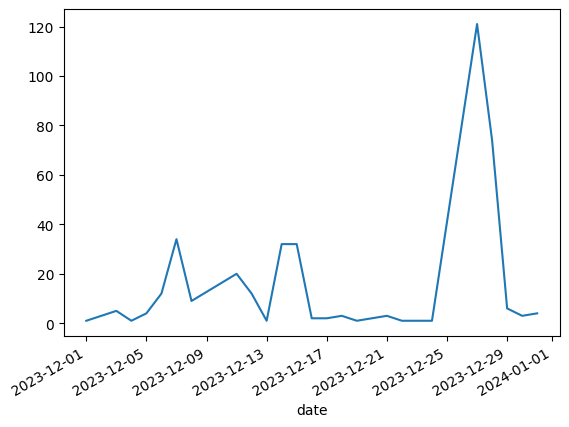

In [78]:
df_invest = df_ind[(df_ind['date']>'2023-11-30')&(df_ind['date']<'2024-01-01')]
df_invest.groupby('date')['sentiment'].count().plot(kind='line')

<ipython-input-35-2668288ec5b1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-35-2668288ec5b1>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


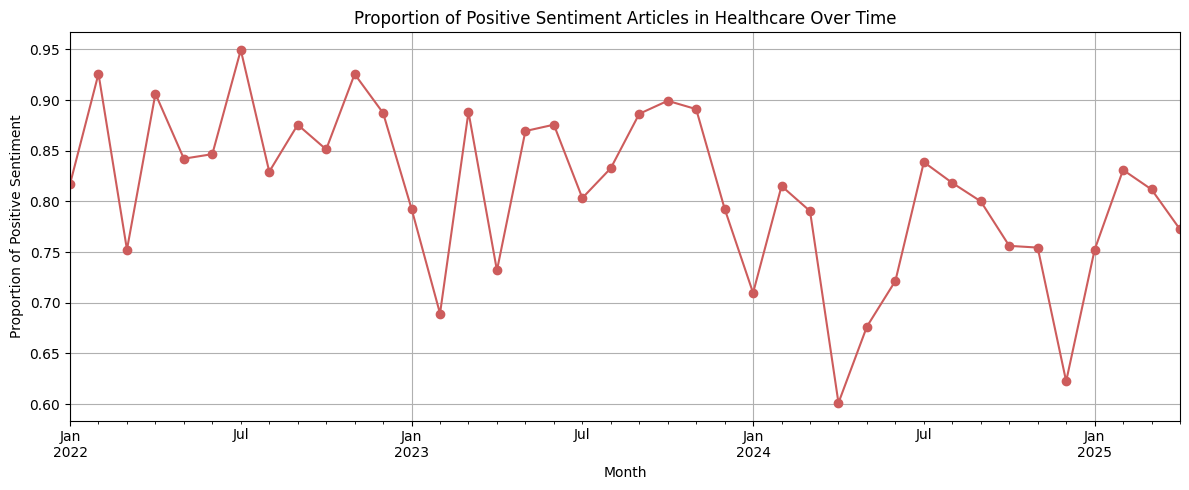

In [35]:
df_ind = df_ai[df_ai['industry']=='Healthcare']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Healthcare Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
df_ind.shape

(5971, 17)

In [40]:
df_ind = df_ind[~df_ind['normalized_products'].apply(lambda x: 'cora' in x)]

In [44]:
# NatWest
df_ind = df_ind[~df_ind['title_clean'].str.contains('NatWest')]

<ipython-input-46-d0aef1bd0a9a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-46-d0aef1bd0a9a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


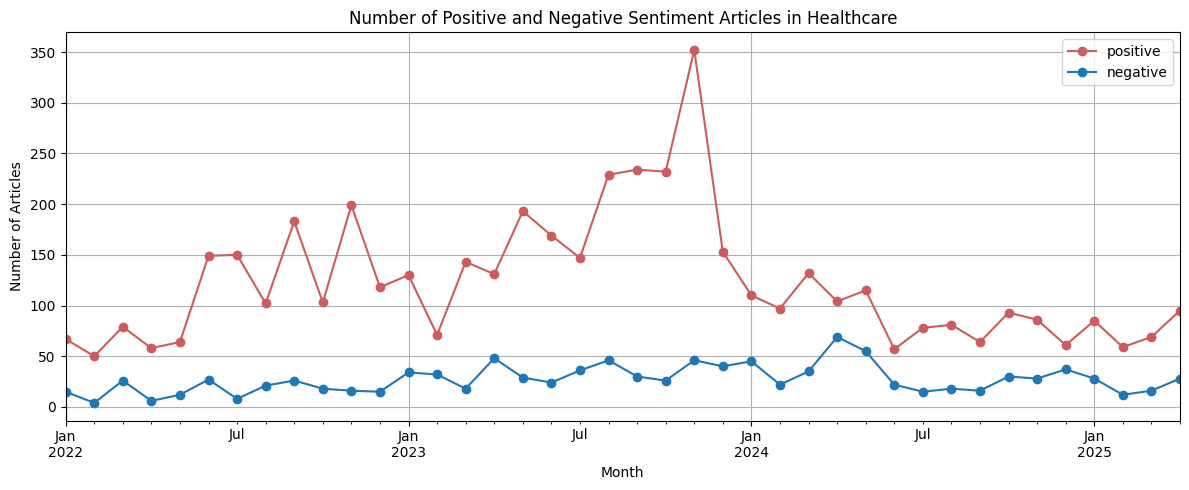

In [46]:
trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles in Healthcare")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

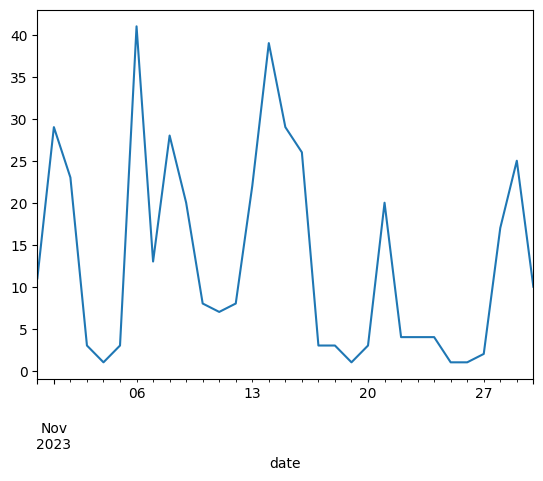

In [47]:
df_invest = df_ind[(df_ind['industry']=='Healthcare')&(df_ind['date']>'2023-10-30')&(df_ind['date']<'2023-12-01')]
df_invest.groupby('date')['sentiment'].count().plot(kind='line')

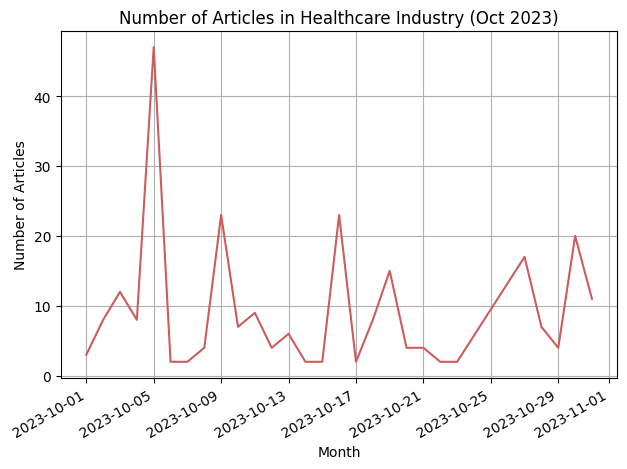

In [50]:
df_invest = df_ind[(df_ind['industry']=='Healthcare')&(df_ind['date']>'2023-09-30')&(df_ind['date']<'2023-11-01')]
df_invest.groupby('date')['sentiment'].count().plot(kind='line', color='indianred')
plt.title("Number of Articles in Healthcare Industry (Oct 2023)")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
df_ai[(df_ai['industry']=='Healthcare')&(df_ai['date']=='2023-10-05')]

url  \
8497    https://www.kbtx.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
11163                                                       https://interestingengineering.com/health/new-ai-model-can-tell-if-you-need-lung-cancer-screening   
15015                                                      https://menafn.com/1107197349/Machine-Learning-Model-Unveils-Stunning-Lung-Cancer-Risk-Predictions   
17308                   https://www.wtap.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
18405   https://www.wtvy.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
18926                   https://www.wbrc.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
18966    https://health.economictimes.indiatimes.com/news/health-it/its-time-to-unlock-the-potentials-of-ai-in-public-health-nakul-jain-wadhwani-ai/104192409   
19687   https://www.wsaw.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
21616   https://www.blackhillsfox.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-d...   
22011                                                      https://www.europeanbusinessreview.com/emotion-ai-as-an-advancement-in-human-machine-interactions/   
27305   https://www.wmbfnews.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-delive...   
32379                   https://www.wilx.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
32807                https://www.1011now.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
38233   https://www.nbc12.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-h...   
47397                            https://www.safetylit.org/citations/index.php?fuseaction=citations.viewdetails&citationIds%5B%5D=citjournalarticle_770103_12   
48870   https://www.wflx.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
55236   https://www.wdam.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
63443                   https://www.wcjb.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
63756   https://www.kswo.com/prnewswire/2023/10/05/new-generative-ai-native-health-company-rhythmx-ai-announces-precision-care-platform-doctors-deliver-hy...   
70062                   https://www.wdam.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
78704                                                                                          https://www.sciencedaily.com/releases/2019/06/190606150222.htm   
89352                   https://www.ksla.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
97650                   https://www.weau.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligence-initiative-drug-discovery/   
98442   https://www.finanzen.at/nachrichten/aktien/patient-organizations-gave-$22-billion-in-grants-for-research--patient-services--and-access-to-care-ove...   
102715           https://www.actionnews5.com/prnewswire/2023/10/05/hoth-therapeutics-announces-merveilleai-artificial-intelligenc

In [30]:
df_ai[(df_ai['industry']=='Healthcare')&(df_ai['date']=='2023-11-06')]

url       date  \
110     https://www.nbc11news.com/prnewswire/2023/11/0... 2023-11-06   
9398    https://www.fox19.com/prnewswire/2023/11/06/na... 2023-11-06   
10493   https://www.fox8live.com/prnewswire/2023/11/06... 2023-11-06   
14580   https://www.nbc11news.com/prnewswire/2023/11/0... 2023-11-06   
18858   https://www.kolotv.com/prnewswire/2023/11/06/e... 2023-11-06   
...                                                   ...        ...   
167821  https://www.kotatv.com/prnewswire/2023/11/06/e... 2023-11-06   
173672  https://www.whsv.com/prnewswire/2023/11/06/emo... 2023-11-06   
176277  https://www.actionnews5.com/prnewswire/2023/11... 2023-11-06   
176291  https://www.cityam.com/natwest-upgrades-ai-cha... 2023-11-06   
179483  https://www.wowt.com/prnewswire/2023/11/06/emo... 2023-11-06   

                                              title_clean  \
110     Emory Healthcare collaborates with Andor Healt...   
9398    NatWest and IBM Collaborate on Generative AI I...   
10493   Eko Health Announces Large-Scale Deployment of...   
14580   NatWest and IBM Collaborate on Generative AI I...   
18858   Emory Healthcare collaborates with Andor Healt...   
...                                                   ...   
167821  Eko Health Announces Large-Scale Deployment of...   
173672  Emory Healthcare collaborates with Andor Healt...   
176277  NatWest and IBM Collaborate on Generative AI I...   
176291  Natwest upgrades AI chatbot to provide more 'h...   
179483  Emory Healthcare collaborates with Andor Healt...   

                                               text_clean  topic    industry  \
110     PoliticsFirst Alert WeatherClosingsCool SnapsC...     17  Healthcare   
9398    town ToursButler CountyClermont CountyWarren C...    217  Healthcare   
10493   StoriesMorning EditionForecastWeekdays w Jim S...    158  Healthcare   
14580   PoliticsFirst Alert WeatherClosingsCool SnapsC...    217  Healthcare   
18858   castsPress Releases4 weather alerts in effectD...     17  Healthcare   
...                                                   ...    ...         ...   
167821  LivestreamNewsKOTA ArtsHealth MedicalLaw Our W...    158  Healthcare   
173672  News Weather AppsAdvertise With UsVA Job Conne...     17  Healthcare   
176277  Watch LiveShare Your PicsRecent VideoDownload ...    217  Healthcare   
176291  for Submit Download App Business Latest Busine...    217  Healthcare   
179483  7 Weather6 On Your SideCOVID-19 CoverageFirst ...     17  Healthcare   

                                           Representation sentiment  \
110     ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
9398    ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
10493   ['heart', 'failure', 'eko', 'diagnose', 'predi...  positive   
14580   ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
18858   ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
...                                                   ...       ...   
167821  ['heart', 'failure', 'eko', 'diagnose', 'predi...  positive   
173672  ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
176277  ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
176291  ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
179483  ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   

        sentiment_score                                               orgs  \
110            0.968401  ['KKCOLIVEJob', 'ReleasesEmory Healthcare', 'A...   
9398           0.961588  ['photosSportsBengalsRedsFC', 'FOX19', 'teamCa...   
10493          0.967821  ['Apple', 'Apple', 'Fox 8Contact', 'agoImperia...   
14580          0.959820  ['KKCOLIVEJob', 'ReleasesNatWest', 'IBM', 'Nat...   
18858          0.969777  ['BarEmory Healthcare', 'Andor Health', 'Emory...   
...                 ...                                                ...   
167821         0.968216  ['College London', 'NHS', 'Eko Health, Inc.', ...   
173672         0.9

In [43]:
#filter date in november 2023


df_ai[(df_ai['industry']=='Healthcare')&(df_ai['date']>'2023-10-30')&(df_ai['date']<'2023-12-01')].sample(10)

url       date  \
96913   https://musescore.com/user/31709576/scores/127... 2023-10-31   
94582   https://www.kmvt.com/prnewswire/2023/11/06/eko... 2023-11-06   
177250  https://www.kait8.com/prnewswire/2023/11/07/de... 2023-11-07   
156473  https://citylife.capetown/uk/uncategorized/cut... 2023-11-15   
59988   https://fox2now.com/news/politics/despite-cong... 2023-11-29   
47764   https://www.latestly.com/agency-news/health-ne... 2023-11-23   
91169   https://www.whsv.com/prnewswire/2023/11/06/nat... 2023-11-06   
86168   https://www.valleynewslive.com/prnewswire/2023... 2023-11-14   
143722  https://www.worldreportnow.com/news/israel-ham... 2023-11-07   
25089   https://www.taranganews.com/news/augmedix-face... 2023-11-28   

                                              title_clean  \
96913   The girl with the flaxen hair - Claude Debussy...   
94582   Eko Health Announces Large-Scale Deployment of...   
177250  Deep Bio Joins CancerX to Revolutionize Cancer...   
156473  Cutting Costs and Increasing Efficiency The Im...   
59988   Despite congressional concerns, AI use rises i...   
47764   Health News - Brigham Researchers' AI Model Co...   
91169   NatWest and IBM Collaborate on Generative AI I...   
86168   University of Miami Health System to Maximize ...   
143722  How AI is Revolutionizing the Healthcare Industry   
25089   Augmedix Faces 'Epic' Challenges In The AI Hea...   

                                               text_clean  topic    industry  \
96913   The girl with the flaxen hair Claude Debussy T...    201  Healthcare   
94582   castsCircle - Country Music LifestylePress Rel...    158  Healthcare   
177250  K8 News LiveK8 Digital AppsSubmit a News TipTa...     39  Healthcare   
156473  Cutting Costs and Increasing Efficiency The Im...    217  Healthcare   
59988   for the Holidays Legal Lens Medical Minute Pro...     17  Healthcare   
47764   ers' AI Model Could Aid in Screening for Heart...    158  Healthcare   
91169   News Weather AppsAdvertise With UsVA Job Conne...    217  Healthcare   
86168   Valley News Live JobsMeet the Sales TeamInvest...     17  Healthcare   
143722  NewsHow AI is Revolutionizing the Healthcare I...     17  Healthcare   
25089   NewsAugmedix Faces Epic Challenges In The AI H...     17  Healthcare   

                                           Representation sentiment  \
96913   ['musescore', 'pdf', 'goudimel', 'nsc', 'gerva...  negative   
94582   ['heart', 'failure', 'eko', 'diagnose', 'predi...  positive   
177250  ['lung', 'lunit', 'cancers', 'detect', 'mammog...  positive   
156473  ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
59988   ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
47764   ['heart', 'failure', 'eko', 'diagnose', 'predi...  positive   
91169   ['osf', 'generation', 'talking', 'devron', 'ce...  positive   
86168   ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
143722  ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
25089   ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   

        sentiment_score                                               orgs  \
96913          0.401020                               ['Woodwind Quintet']   
94582          0.968429  ['ReleasesEko Health', 'College London', 'NHS'...   
177250         0.966645  ['K8 News LiveK8', 'KAITAbout', 'TeamKAIT', 'C...   
156473         0.956473                                                 []   
59988          0.619554  ['FOX 2', 'FOX 2', 'KPLR', 'SkyFOX', 'FanDuel'...   
47764          0.920308              ['IDF', 'Al-Shifa Hospital', 'Tesla']   
91169          0.964349  ['ConnectionsWHSV', 'Aire Serv.', 'ReleasesNat...   
86168          0.969376  ['ValleyVNL', 'OnNBCCBS', 'BureauPowerNationMi...   
143722         0.964009                                                 []   
25089          0.963642  ['NewsAugmedix', 'NASDAQ', 'Augmedix', 'Tarang...   

                                                   people          

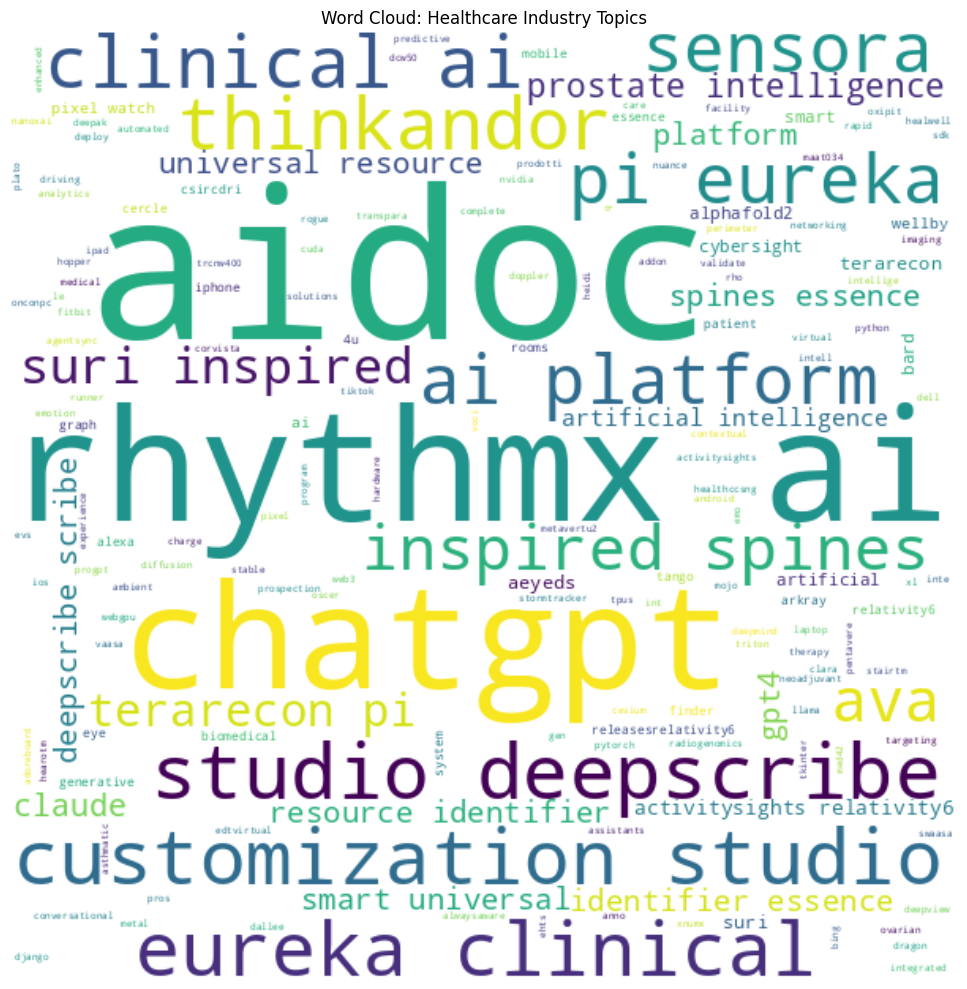

In [59]:
make_word_cloud(df_ind[(df_ind['industry']=='Healthcare')&(df_ind['date']>'2023-09-30')&(df_ind['date']<'2023-12-01')],'Healthcare','normalized_products')

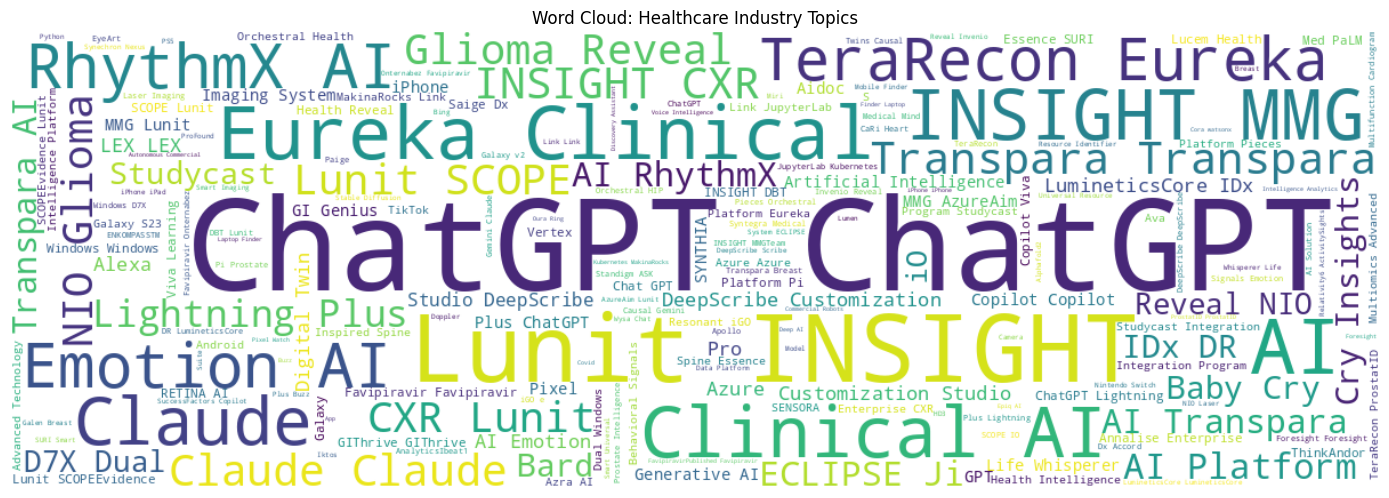

In [35]:
make_word_cloud(df_ai,'Healthcare','products')

In [ ]:
make_word_cloud(df_ai[(df_ai['industry']=='Healthcare')&(df_ai['date']>'2023-10-30')&(df_ai['date']<'2023-12-01')],'Healthcare','orgs')

<ipython-input-29-5ef6c000afec>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
<ipython-input-29-5ef6c000afec>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


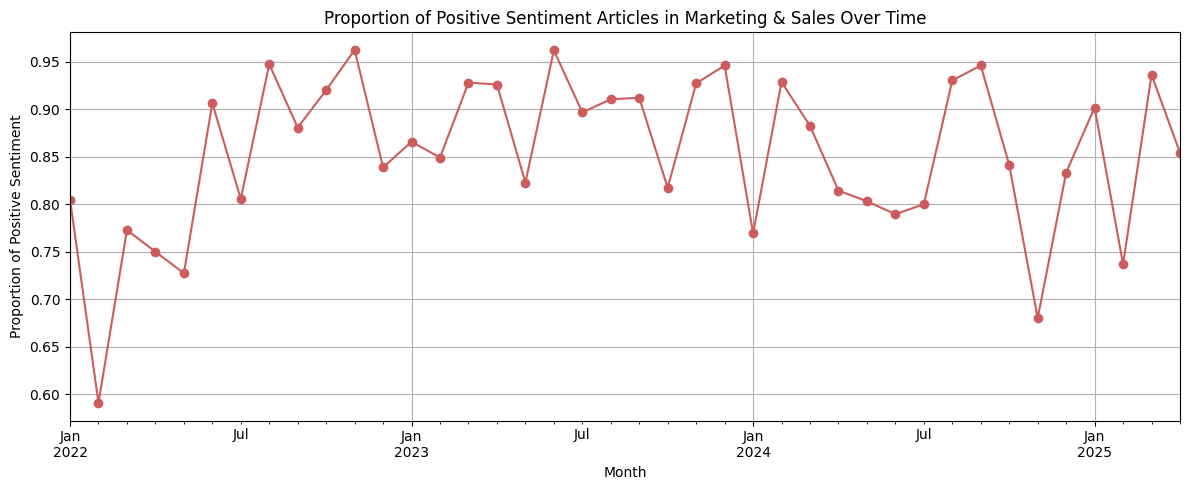

In [29]:
df_ind = df_ai[df_ai['industry']=='Marketing & Sales']

trend = (
    df_ind[df_ind['sentiment'] == 'positive']
    .groupby(pd.Grouper(key="date", freq="M"))["sentiment"]
    .count()
    / df_ind.groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
)

# Plot
plt.figure(figsize=(12, 5))
trend.plot(marker="o", color='indianred')
plt.title("Proportion of Positive Sentiment Articles in Marketing & Sales Over Time")
plt.ylabel("Proportion of Positive Sentiment")
plt.xlabel("Month")
# plt.ylim(0.5, 1)  # Optional: to keep y-axis between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-30-fece3551d9a0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
<ipython-input-30-fece3551d9a0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()


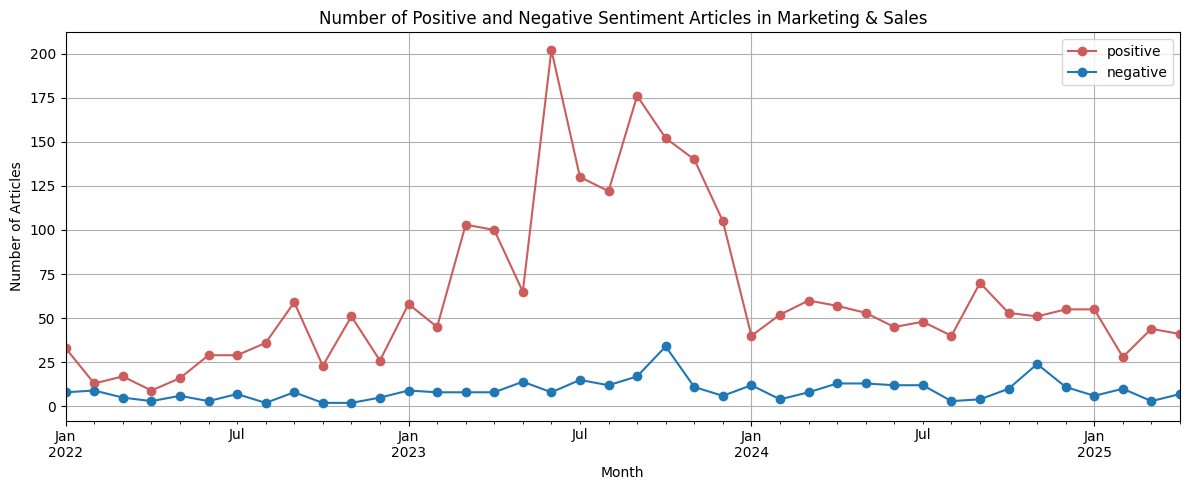

In [30]:
trend_pos = df_ind[df_ind['sentiment']=='positive'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
trend_neg = df_ind[df_ind['sentiment']=='negative'].groupby(pd.Grouper(key="date", freq="M"))["sentiment"].count()
plt.figure(figsize=(12, 5))
trend_pos.plot(marker="o",color='indianred',label='positive')
trend_neg.plot(marker="o",label='negative')
plt.title("Number of Positive and Negative Sentiment Articles in Marketing & Sales")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df_ai[df_ai['industry']=='Marketing & Sales'].head()

url        date  \
7    https://drinksretailingnews.co.uk/news/fullsto...  2023-03-30   
44   https://www.bworldonline.com/sparkup/2024/10/2...  2024-10-20   
60   https://www.finanznachrichten.de/nachrichten-2...  2022-03-29   
108  https://www.nasdaq.com/articles/ebay-steps-abo...  2023-07-18   
116  https://www.newsbreak.com/news/2957371340563-g...  2023-03-19   

                                           title_clean  \
7    Can AI benefit drinks retailers? - Drinks Reta...   
44   Ideathon tackles solving real-world problems t...   
60   SentiOne SA. The top 100 most popular brands o...   
108  eBay Steps Aboard the AI Bandwagon with Certil...   
116  Generative AI and ChatGPT How the Tech Could O...   

                                            text_clean  topic  \
7    Can AI benefit drinks retailers? - Drinks Reta...     16   
44   Top Stories Corporate Stock Market Banking Eco...    145   
60   auf FNAlle NewsRubrikenAktien im BlickpunktAd ...     16   
108  eBay Steps Aboard the AI Bandwagon with Certil...     16   
116  AI and ChatGPT How the Tech Could Overhaul the...     16   

              industry                                     Representation  \
7    Marketing & Sales  ['advertising', 'retail', 'experiences', 'revo...   
44   Marketing & Sales  ['roofing', 'mortgage', 'time', 'codebreakers'...   
60   Marketing & Sales  ['advertising', 'retail', 'experiences', 'revo...   
108  Marketing & Sales  ['advertising', 'retail', 'experiences', 'revo...   
116  Marketing & Sales  ['advertising', 'retail', 'experiences', 'revo...   

    sentiment  sentiment_score  \
7    positive         0.963158   
44   positive         0.941109   
60   positive         0.708086   
108  positive         0.959401   
116  positive         0.826147   

                                                  orgs  \
7                                      ['Recognition']   
44   ['The Nation', 'BW', 'The Nation', 'BW', 'KMC'...   
60   ['FNAlle', 'Indizes M P', 'TabakHalbleiterHand...   
108  ['eBay', 'Certilogo', 'Nasdaq', 'Nasdaq', 'Nas...   
116                                        ['Walmart']   

                                                people              products  \
7    ['Rachel Badham', 'Rachel Badham', 'Brede Bj r...                    []   
44                                                  []  ['SparkUp Ideathon']   
60                                                  []                    []   
108                                ['Phil Mackintosh']                    []   
116  ['Liz Dominguez,4', 'Liz Dominguez,4', 'agoLan...           ['ChatGPT']   

                                             locations  
7                                                   []  
44                                        ['US', 'US']  
60                                                  []  
108                                           ['U.S.']  
116  ['sayJoliet', 'revealedMesa', 'Los AngelesLos'...

In [19]:
#set width df
pd.set_option('display.max_colwidth', 150)

df_ai.loc[df_ai['industry']=='Marketing & Sales','title_clean'].sample(10)

146709                                                                             Man goes from council estate to 470m fortune with artificial intelligence
144604                                                                        The Tech Advantage Leveraging AI and Automation for Better Customer Experience
14182                                                                                     IgniteTech Announced as Visionary Sponsor for IMAGINE AI LIVE 2024
69075                                                                                                                        Is AI changing the way we shop?
164579                                                                                How modern retailers leverage AI at every stage of the buyer s journey
41516                                                                                                                     AIMCLEAR launches AI Marketing Lab
18114     Drake TAKES DOWN Kendrick Lamar diss track after Tupac's estate threatened rapper with legal action for using AI to recreate late rap icon's voice
47172                           Inbenta Expands its Customer Experience Platform, Allowing Companies to Integrate the Generative AI Solution of Their Choice
170632                                                                      Northern Ireland online estate agent invests 250,000 in generative AI technology
65859                                                                                        Real-Time Guidance Practical AI Tools for Contact Center Agents
Name: title_clean, dtype: object

In [8]:
top10_2 = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/topic_info_lastest.csv')

In [2]:
def make_word_cloud(top10_2,industry,rep):
    tech_topics = top10_2[top10_2['industry'] == industry]
    keywords = sum(tech_topics[rep].apply(ast.literal_eval), [])
    keyword_text = ' '.join(keywords)
    # Generate word cloud
    wordcloud = WordCloud(width=600, height=600, background_color='white').generate(keyword_text)

    # Plot
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud: "+industry+ " Industry Topics")
    plt.tight_layout()
    plt.show()

In [4]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_normalized.csv')

In [5]:
df_ai.head()

url        date  \
0  http://businessnewsthisweek.com/business/infog...  2023-05-20   
1    https://allafrica.com/stories/202504250184.html  2025-04-25   
2  https://asiatimes.com/2023/07/yang-lan-intervi...  2023-07-25   
3  https://cdn.meritalk.com/articles/commerce-nom...  2025-02-04   
4  https://citylife.capetown/hmn/uncategorized/re...  2023-11-11   

                                         title_clean  \
0  Infogain AI Business Solutions Now Available i...   
1  Africa AI Policies in Africa - Lessons From Gh...   
2    Yang Lan interviews academics on AI development   
3  Commerce Nominee Promises Increased Domestic A...   
4  Revolutionizing the Manufacturing Industry The...   

                                          text_clean  topic  \
0  Infogain AI Business Solutions Now Available i...     53   
1  Africa AI Policies in Africa - Lessons From Gh...     93   
2  a link to a friend (Opens in new window)Click ...    261   
3  Details By Andrew Rice Feb 3, 2025 4 14 pm Com...     52   
4  Revolutionizing the Manufacturing Industry The...      5   

                  industry                                     Representation  \
0      Business & Startups  ['small', 'entrepreneurs', 'unlocking', 'ango'...   
1   Employment & Workforce  ['biontech', 'intellitek', 'founded', 'streaml...   
2               Technology  ['office', 'ordered', 'holiday', 'highlighted'...   
3      Government & Policy  ['biden', 'order', 'executive', 'safeguards', ...   
4  Finance & Stock Markets  ['usd', 'cagr', 'growth', 'projected', 'techna...   

  sentiment  sentiment_score  \
0  positive         0.968321   
1  positive         0.953480   
2  positive         0.863181   
3  positive         0.887693   
4  positive         0.960287   

                                                orgs  \
0  ['Infogain', 'Microsoft', 'Courtyard by Marrio...   
1                                      ['AllAfrica']   
2  ['Asia Times', 'ISIS', 'the Institute for AI I...   
3  ['Commerce', 'the Department of Commerce', 'th...   
4                                                 []   

                                              people  \
0  ['Dibyendu Bhattacharya', 'Sonu Sood s', 'Anub...   
1  ['My Account', 'My Account', 'Thompson Gyedu K...   
2  ['Yuval Noah Harari', 'Yang Lan', 'Hun Manet',...   
3  ['Andrew Rice', 'Howard Lutnick', 'Donald Trum...   
4                                ['Hla', 'tauj Xov']   

                                            products  \
0  ['Azure', 'Azure', 'Azure', 'Azure', 'Azure', ...   
1                                                 []   
2                                        ['ChatGPT']   
3                                                 []   
4                                                 []   

                                           locations  \
0                        ['Los Gatos', 'California']   
1  ['Ghana', 'Rwanda', 'Ghana', 'Rwanda', 'Johann...   
2                           ['US', 'China', 'China']   
3                  ['America', 'America', 'America']   
4                                       ['Lub neej']   

                                     normalized_orgs  \
0  ['courtyard by marriott', 'renewable energy', ...   
1                                      ['allafrica']   
2  ['asia times', 'the institute for ai industry ...   
3  ['the committee of commerce science and transp...   
4                                                 []   

                                   normalized_people normalized_products  \
0  ['subroto sen', 'nandakumar jairam', 'anubhav ...           ['azure']   
1           ['my account', 'thompson gyedu kwarkye']                  []   
2  ['yuval noah harari', 'john hennessy', 'hun ma...         ['chatgpt']   
3  ['lutnick', 'andrew rice', 'donald trump', 'ho...                  []   
4                                ['hla', 'tauj xov']                  []   

                                normalized_locations  
0                        ['california', 'los ga

In [3]:
from wordcloud import WordCloud
import ast
from matplotlib import pyplot as plt

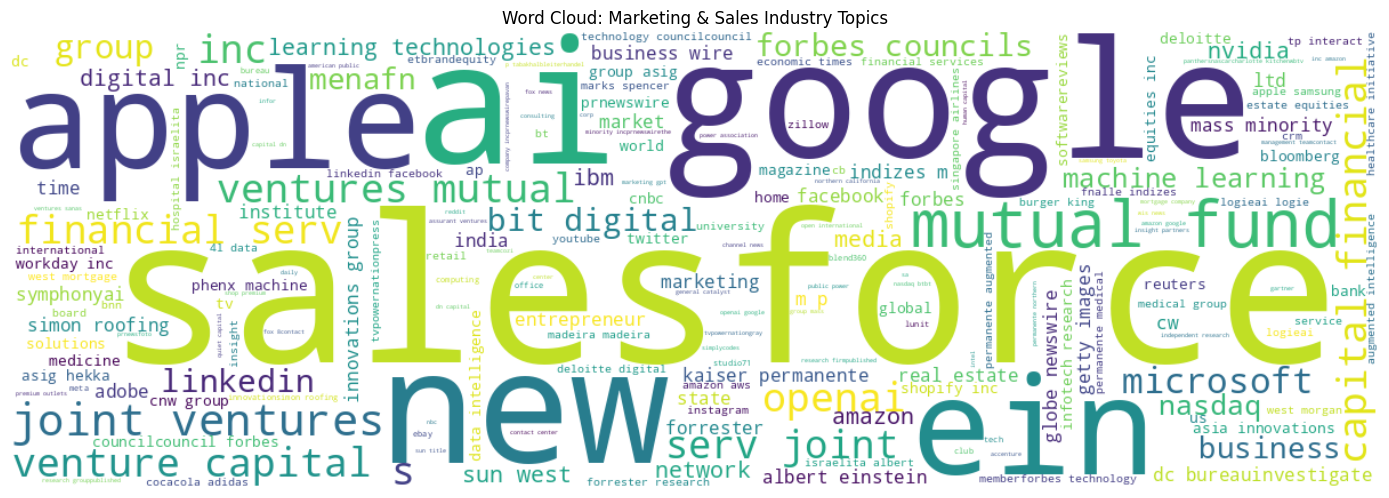

In [8]:
make_word_cloud(df_ai,'Marketing & Sales','normalized_orgs')

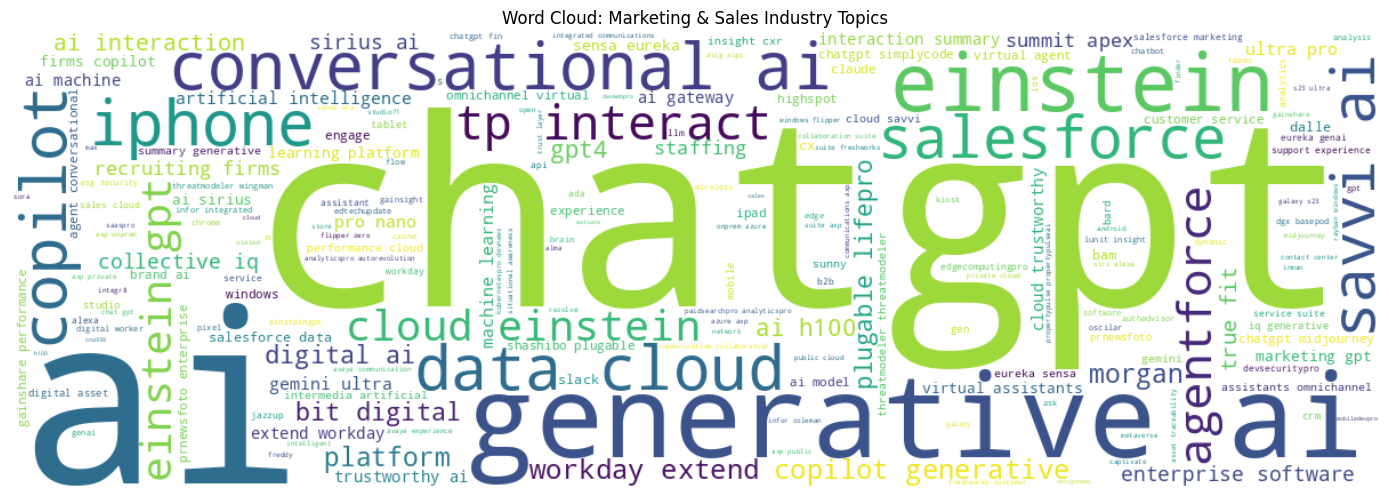

In [10]:
make_word_cloud(df_ai,'Marketing & Sales','normalized_products')

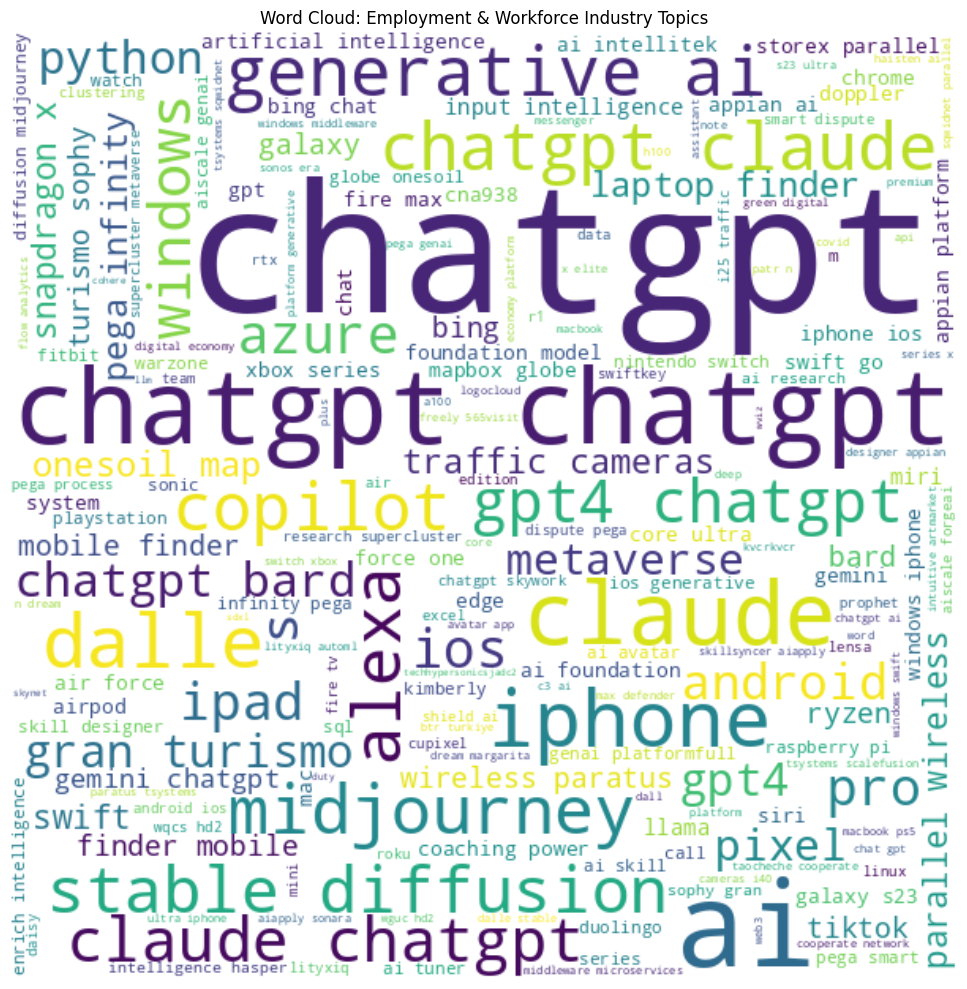

In [148]:
make_word_cloud(df_ai,'Employment & Workforce','normalized_products')

In [ ]:
make_word_cloud(top10_2,'Marketing & Sales','Representation')

In [137]:
df = df_ai[df_ai['industry']=='Employment & Workforce']

In [92]:
df.shape

(12092, 17)

In [138]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Combine stopwords
default_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = default_stopwords.union(nltk_stopwords).union({
    "ai", "artificial", "intelligence", "says", "will", "use", "one", "new", "chatgpt"
})

def preprocess_text(text_series):
    # Join all texts
    text = " ".join(text_series.dropna().astype(str))

    # Lowercase
    text = text.lower()

    # Remove non-alphabetic characters and digits
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove short words (<=2 letters)
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])

    return text

clean_text = preprocess_text(df['title_clean'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


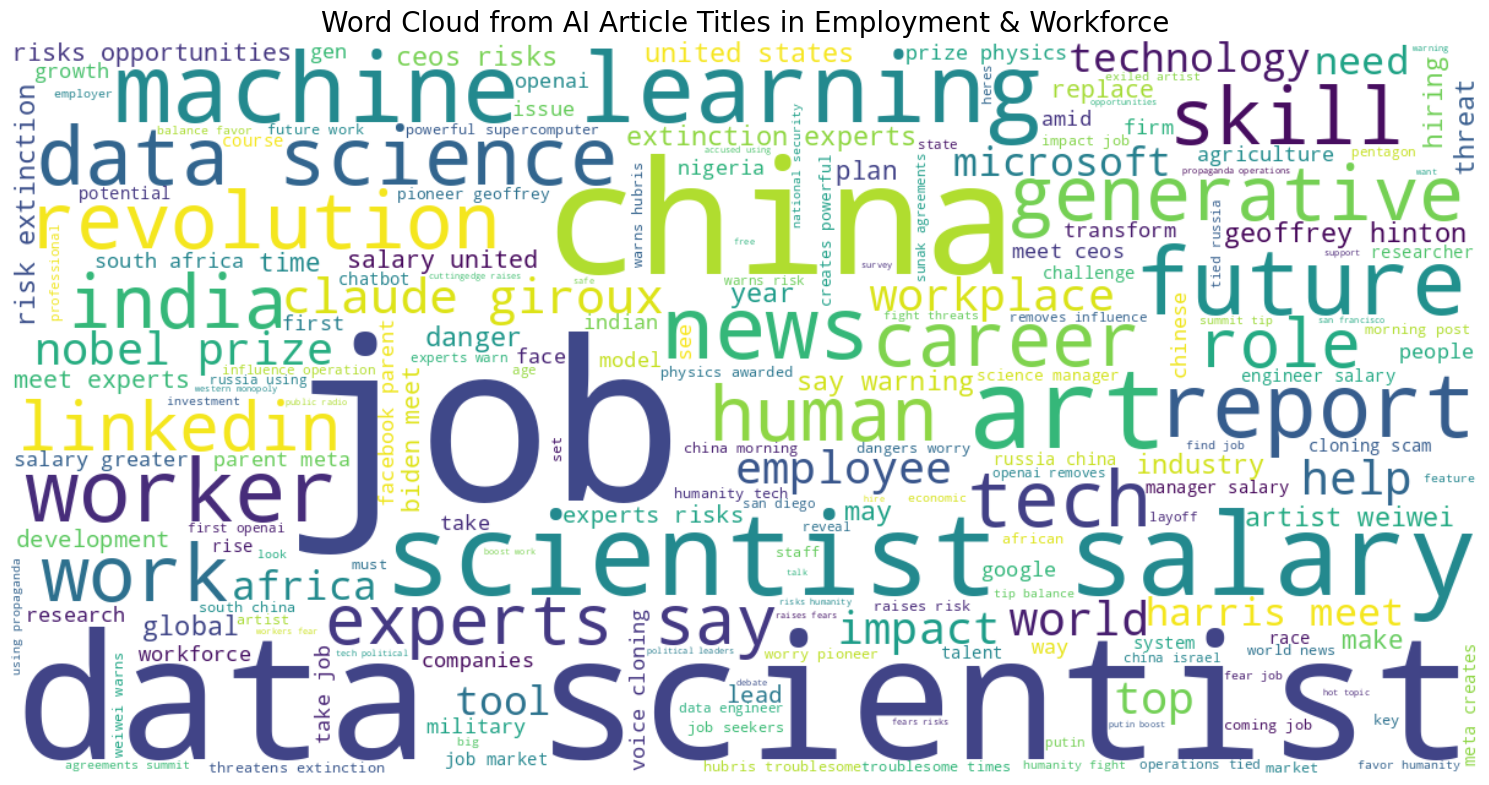

In [139]:
# Generate Word Cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=custom_stopwords,
    max_words=200,
    colormap='viridis'
).generate(clean_text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from AI Article Titles in Employment & Workforce", fontsize=20)
plt.tight_layout()
plt.show()

In [161]:
df_inv = df_ind[df_ind['title_clean'].str.lower().str.contains('chat')]

In [162]:
df_inv.shape

(494, 17)

In [163]:
pd.set_option('display.max_colwidth', 150)
df_inv[['title_clean','text_clean','sentiment']].sample(10)

title_clean  \
102955                                             DeepSeek This is what live censorship looks like in the Chinese AI chatbot   
171454                                                     China approves AI chatbot releases but will it unleash innovation?   
79883   AI and the future of work 5 experts on what ChatGPT, DALL-E and other AI tools mean for artists and knowledge workers   
129815                                                               Dubai Is It Safe For Employees To Use Chatgpt In Office?   
91910                                                                            Apple bans ChatGPT at work for its employees   
27149                                                                               SwiftKey After Bing Chat AI comes Copilot   
25686                           ChatGPT-Powered Wellness Revolution Health Innovator Muscle Lab Unveils Custom Recovery Plans   
8345              ChatGPT s rise heralds brave new world where AI could rule over replaceable humans South China Morning Post   
111406                                            unitQ Unveils AI Analysis of User Feedback for OpenAI's New ChatGPT iOS App   
90457                                                                             ChatGPT Can Influence Users Moral Judgments   

                                                                                                                                                   text_clean  \
102955  International Tech Nature Overview Channels AI Robots Crypto Ecosystem Fintech Health International Investors Mobility People Startups Events EXCL...   
171454  World China Japan India South Korea Indonesia Taiwan Thailand U.S. East Asia China Hong Kong Macao Taiwan Mongolia Japan South Korea North Korea S...   
79883   Notices MOST POPULAR Rackspace founder says company on trajectory of death Photos Thomas J. Henry sells 7.5M Dominion mansion NSA Texas drops some...   
129815  News News by Industry News by Region American Europe Arab World Asia Africa RSS Press Distribution Press releases Submit Your Articles Press Relea...   
91910   Apps Apple bans ChatGPT at work for its employees By Tammy Rogers published 19 May 2023 It's worried about the learning algorithms. Comments (0) (...   
27149   Linked-in RSS SwiftKey After Bing Chat AI comes Copilot By Martin Brinkmann Published 2 hours ago No Comments Tweet Less than a year after adding ...   
25686   VideoWatch RadarWatch 10 11 24 7 WeatherWeather Shield Request FormWeather CamerasDownload the Weather AppSportsNReportHigh SchoolSports VideoScor...   
8345    factory workers among the humans being replaced by robots and AI. Photo Getty Images Opinion Opinion April Zhang ChatGPT s rise heralds brave new ...   
111406  News Weather AppsAdvertise With UsVA Job ConnectionsWHSV History MonthFirst Responders FirstFriendly City FortuneBirthdays and AnniversariesSubmit...   
90457   Advertise US World Business Sports Entertainment Technology Science ChatGPT Can Influence Users Moral Judgments April 12, 2023 by Claudia Bergnaum...   

       sentiment  
102955  positive  
171454  positive  
79883   positive  
129815  positive  
91910   negative  
27149   positive  
25686   positive  
8345    positive  
111406  positive  
90457   negative

In [134]:
df_ai = df_ai[~df_ai['title_clean'].str.lower().str.contains('salary -')]

In [135]:
df_ai.shape

(180564, 17)

In [136]:
df_ai.to_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_normalized_cleaned.csv',index=False)

In [4]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_normalized_cleaned.csv')
df_ai.head()

url        date  \
0  http://businessnewsthisweek.com/business/infog...  2023-05-20   
1    https://allafrica.com/stories/202504250184.html  2025-04-25   
2  https://asiatimes.com/2023/07/yang-lan-intervi...  2023-07-25   
3  https://cdn.meritalk.com/articles/commerce-nom...  2025-02-04   
4  https://citylife.capetown/hmn/uncategorized/re...  2023-11-11   

                                         title_clean  \
0  Infogain AI Business Solutions Now Available i...   
1  Africa AI Policies in Africa - Lessons From Gh...   
2    Yang Lan interviews academics on AI development   
3  Commerce Nominee Promises Increased Domestic A...   
4  Revolutionizing the Manufacturing Industry The...   

                                          text_clean  topic  \
0  Infogain AI Business Solutions Now Available i...     53   
1  Africa AI Policies in Africa - Lessons From Gh...     93   
2  a link to a friend (Opens in new window)Click ...    261   
3  Details By Andrew Rice Feb 3, 2025 4 14 pm Com...     52   
4  Revolutionizing the Manufacturing Industry The...      5   

                  industry                                     Representation  \
0      Business & Startups  ['small', 'entrepreneurs', 'unlocking', 'ango'...   
1   Employment & Workforce  ['biontech', 'intellitek', 'founded', 'streaml...   
2               Technology  ['office', 'ordered', 'holiday', 'highlighted'...   
3      Government & Policy  ['biden', 'order', 'executive', 'safeguards', ...   
4  Finance & Stock Markets  ['usd', 'cagr', 'growth', 'projected', 'techna...   

  sentiment  sentiment_score  \
0  positive         0.968321   
1  positive         0.953480   
2  positive         0.863181   
3  positive         0.887693   
4  positive         0.960287   

                                                orgs  \
0  ['Infogain', 'Microsoft', 'Courtyard by Marrio...   
1                                      ['AllAfrica']   
2  ['Asia Times', 'ISIS', 'the Institute for AI I...   
3  ['Commerce', 'the Department of Commerce', 'th...   
4                                                 []   

                                              people  \
0  ['Dibyendu Bhattacharya', 'Sonu Sood s', 'Anub...   
1  ['My Account', 'My Account', 'Thompson Gyedu K...   
2  ['Yuval Noah Harari', 'Yang Lan', 'Hun Manet',...   
3  ['Andrew Rice', 'Howard Lutnick', 'Donald Trum...   
4                                ['Hla', 'tauj Xov']   

                                            products  \
0  ['Azure', 'Azure', 'Azure', 'Azure', 'Azure', ...   
1                                                 []   
2                                        ['ChatGPT']   
3                                                 []   
4                                                 []   

                                           locations  \
0                        ['Los Gatos', 'California']   
1  ['Ghana', 'Rwanda', 'Ghana', 'Rwanda', 'Johann...   
2                           ['US', 'China', 'China']   
3                  ['America', 'America', 'America']   
4                                       ['Lub neej']   

                                     normalized_orgs  \
0  ['courtyard by marriott', 'renewable energy', ...   
1                                      ['allafrica']   
2  ['asia times', 'the institute for ai industry ...   
3  ['the committee of commerce science and transp...   
4                                                 []   

                                   normalized_people normalized_products  \
0  ['subroto sen', 'nandakumar jairam', 'anubhav ...           ['azure']   
1           ['my account', 'thompson gyedu kwarkye']                  []   
2  ['yuval noah harari', 'john hennessy', 'hun ma...         ['chatgpt']   
3  ['lutnick', 'andrew rice', 'donald trump', 'ho...                  []   
4                                ['hla', 'tauj xov']                  []   

                                normalized_locations  
0                        ['california', 'los ga

In [5]:
df_ai['normalized_locations'] = df_ai['normalized_locations'].apply(ast.literal_eval)
df_ai['normalized_people'] = df_ai['normalized_people'].apply(ast.literal_eval)
df_ai['normalized_products'] = df_ai['normalized_products'].apply(ast.literal_eval)
df_ai['normalized_orgs'] = df_ai['normalized_orgs'].apply(ast.literal_eval)

In [6]:
# Explode for aggregation
exploded_df = df_ai.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(10))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
openai               3838     15885  19723        0.805405
google               3397     14619  18016        0.811445
microsoft            2055     11395  13450        0.847212
apple                2261      8295  10556        0.785809
nvidia                449      5390   5839        0.923103
amazon               1152      4434   5586        0.793770
meta                  631      4129   4760        0.867437
facebook             1680      2647   4327        0.611740
linkedin             1553      2409   3962        0.608026
youtube              1832      1919   3751        0.511597


In [7]:
sentiment_summary.reset_index(inplace=True)
sentiment_summary.head(20)

sentiment                 normalized_orgs  negative  positive  total  \
0                                  openai      3838     15885  19723   
1                                  google      3397     14619  18016   
2                               microsoft      2055     11395  13450   
3                                   apple      2261      8295  10556   
4                                  nvidia       449      5390   5839   
5                                  amazon      1152      4434   5586   
6                                    meta       631      4129   4760   
7                                facebook      1680      2647   4327   
8                                linkedin      1553      2409   3962   
9                                 youtube      1832      1919   3751   
10                                 nasdaq       327      3364   3691   
11                                reuters       610      3022   3632   
12                                    ein         0      3285   3285   
13                                     ap       881      2287   3168   
14                                samsung       580      2531   3111   
15            joint ventures mutual funds      3039         0   3039   
16                           getty images       733      2186   2919   
17                                twitter      1061      1675   2736   
18         venture capital financial serv      2680         0   2680   
19                                    npr      2003       391   2394   

sentiment  positive_ratio  
0                0.805405  
1                0.811445  
2                0.847212  
3                0.785809  
4                0.923103  
5                0.793770  
6                0.867437  
7                0.611740  
8                0.608026  
9                0.511597  
10               0.911406  
11               0.832048  
12               1.000000  
13               0.721907  
14               0.813565  
15               0.000000  
16               0.748887  
17               0.612208  
18               0.000000  
19               0.163325

In [21]:
not_org_list = ['facebook', 'linkedin', 'youtube', 'reuters', 'ein', 'getty images', 'npr','npr news','twitter',\
                'joint ventures mutual funds']

In [22]:
sentiment_summary= sentiment_summary[~sentiment_summary['normalized_orgs'].isin(not_org_list)]

In [23]:
sentiment_summary.head(15)

sentiment                 normalized_orgs  negative  positive  total  \
0                                  openai      3838     15885  19723   
1                                  google      3397     14619  18016   
2                               microsoft      2055     11395  13450   
3                                   apple      2261      8295  10556   
4                                  nvidia       449      5390   5839   
5                                  amazon      1152      4434   5586   
6                                    meta       631      4129   4760   
10                                 nasdaq       327      3364   3691   
13                                     ap       881      2287   3168   
14                                samsung       580      2531   3111   
18         venture capital financial serv      2680         0   2680   
20                                    fcc      1286       718   2004   
22                              instagram       743      1063   1806   
23                                   cnbc       232      1546   1778   
24                              bloomberg       353      1420   1773   

sentiment  positive_ratio  
0                0.805405  
1                0.811445  
2                0.847212  
3                0.785809  
4                0.923103  
5                0.793770  
6                0.867437  
10               0.911406  
13               0.721907  
14               0.813565  
18               0.000000  
20               0.358283  
22               0.588594  
23               0.869516  
24               0.800902

In [19]:
df_ind = df_ai[df_ai['normalized_orgs'].apply(lambda x: 'joint ventures mutual funds' in x)]


In [20]:
df_ind.sample(10)

url        date  \
64573   https://www.prnewswire.com/news-releases/speak...  2024-05-30   
31284   https://www.prnewswire.com/news-releases/nec-s...  2022-10-10   
109382  https://www.prnewswire.com/news-releases/realr...  2024-05-29   
64054   https://www.prnewswire.com/news-releases/eleme...  2024-05-08   
79825   https://www.newswire.ca/news-releases/the-hous...  2024-10-21   
13709   https://www.prnewswire.com/news-releases/flybr...  2024-05-22   
104898  https://www.prnewswire.com/news-releases/adthe...  2024-02-27   
27886   https://www.prnewswire.com/news-releases/perim...  2023-04-18   
3975    https://www.prnewswire.com/news-releases/delta...  2022-04-05   
94067   https://www.prnewswire.com/news-releases/trans...  2023-10-05   

                                              title_clean  \
64573   Speakly AI Shines at VivaTech 2024 with Its LL...   
31284   NEC Selects Supermicro GPU Systems for One of ...   
109382  RealReviews.io Secures Major Funding to Expand...   
64054   Elementary Secures Strategic Investment from R...   
79825   The house hippo returns to tackle AI this Medi...   
13709   Flybridge Unveils AI Index to Track Market Lea...   
104898  AdTheorent Launches Point , a Suite of Machine...   
27886   Perimeter Medical Imaging AI to Present at the...   
3975    Delta Media Leverages Automation, AI To Create...   
94067   'Transformative' AI will lead to rapid 25 effi...   

                                               text_clean  topic  \
64573   Topics Business Money Auto TransportationAll A...     72   
31284   Topics Business Money Auto TransportationAll A...    245   
109382  Topics Business Money Auto TransportationAll A...     11   
64054   Topics Business Money Auto TransportationAll A...    177   
79825   Topics Business Auto TransportationAll Automot...     26   
13709   Topics Business Money Auto TransportationAll A...     86   
104898  Topics Business Money Auto TransportationAll A...    179   
27886   Topics Business Money Auto TransportationAll A...     76   
3975    Topics Business Money Auto TransportationAll A...    145   
94067   Topics Business Money Auto TransportationAll A...    241   

                     industry  \
64573   Media & Entertainment   
31284              Technology   
109382    Business & Startups   
64054     Business & Startups   
79825      Lifestyle & Family   
13709              Technology   
104898             Automotive   
27886              Technology   
3975        Marketing & Sales   
94067     Government & Policy   

                                           Representation sentiment  \
64573   ['peat', 'vistry', 'amelia', 'everest', 'row',...  negative   
31284   ['supermicro', 'gpu', 'servers', 'portfolio', ...  negative   
109382  ['funding', 'raises', 'series', 'led', 'startu...  negative   
64054   ['adoption', 'info', 'crab', 'makeshift', 'gpt...  negative   
79825   ['newsrooms', 'standards', 'damaged', 'network...  negative   
13709   ['remedies', 'sap', 'grimes', 'paypal', 'swiss...  negative   
104898  ['skan', 'artificial', 'wise', 'hyper', 'ferru...  negative   
27886   ['market', 'concertai', 'cell', 'nuance', 'dea...  negative   
3975    ['roofing', 'mortgage', 'time', 'codebreakers'...  negative   
94067   ['leaders', 'heartened', 'sequoia', 'marchant'...  negative   

        sentiment_score                                               orgs  \
64573          0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
31284          0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
109382         0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
64054          0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
79825          0.068222  ['Joint Ventures Mutual Funds', 'Venture Capit...   
13709          0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
104898         0.067587  ['Joint Ventures Mutual Funds', 'Venture Capit...   
27886          0.067587  ['Joint Ventures Mutual Funds', 'V

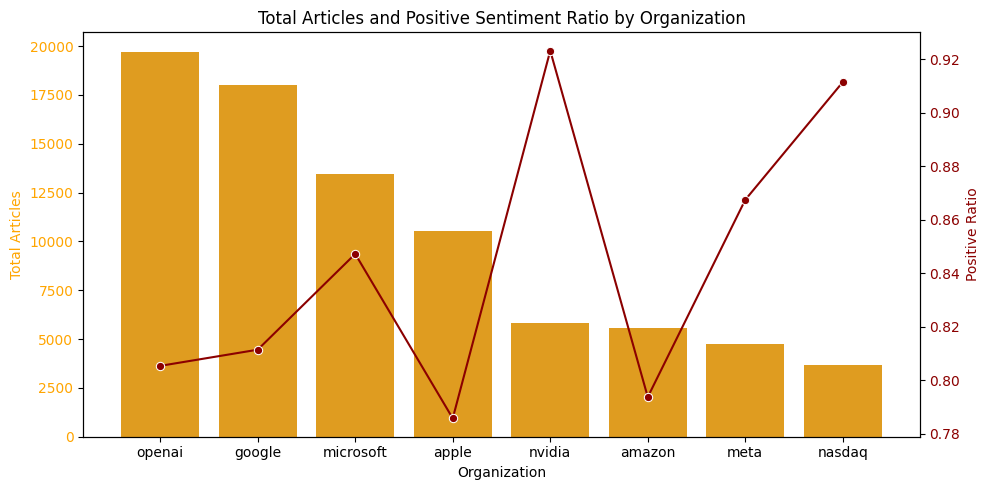

In [28]:
df = sentiment_summary.head(8)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for total
sns.barplot(x='normalized_orgs', y='total', data=df, ax=ax1, color='orange')
ax1.set_ylabel('Total Articles', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlabel('Organization')

# Line plot for positive ratio
ax2 = ax1.twinx()
sns.lineplot(x='normalized_orgs', y='positive_ratio', data=df, ax=ax2, color='darkred', marker='o')
ax2.set_ylabel('Positive Ratio', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Total Articles and Positive Sentiment Ratio by Organization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df_ind = df_ai[df_ai['industry']=='Legal Services']
exploded_df = df_ind.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(10))

sentiment           negative  positive  total  positive_ratio
normalized_orgs                                              
openai                   464       253    717        0.352859
microsoft                242       145    387        0.374677
the new york times       168        31    199        0.155779
google                    45       109    154        0.707792
npr                      120        16    136        0.117647
times                    108        18    126        0.142857
ap                        84        35    119        0.294118
apple                     54        55    109        0.504587
npr news                  91         2     93        0.021505
linkedin                  41        38     79        0.481013


In [18]:
df_ind = df_ai[df_ai['industry']=='Media & Entertainment']
exploded_df = df_ind.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(10))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
openai                104       456    560        0.814286
google                132       428    560        0.764286
apple                 140       267    407        0.656020
microsoft              67       333    400        0.832500
youtube               112       274    386        0.709845
facebook              100       105    205        0.512195
getty images           89        95    184        0.516304
beatles               114        58    172        0.337209
ap                     71       100    171        0.584795
amazon                 53       114    167        0.682635


In [29]:
exploded_df = df_ai.explode('normalized_products')

# Group by entity and sentiment
sentiment_summary_product = (
    exploded_df.groupby('normalized_products')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_product['total'] = sentiment_summary_product.sum(axis=1)
sentiment_summary_product['positive_ratio'] = (
    sentiment_summary_product.get('positive', 0) / sentiment_summary_product['total']
)

# Optional: sort and view
sentiment_summary_product = sentiment_summary_product.sort_values(by='total', ascending=False)
print(sentiment_summary_product.head(20))

sentiment            negative  positive  total  positive_ratio
normalized_products                                           
chatgpt                  5543     18728  24271        0.771620
iphone                    968      2477   3445        0.719013
bard                      664      2157   2821        0.764622
windows                   628      2189   2817        0.777068
gemini                    407      1893   2300        0.823043
gpt4                      222      1971   2193        0.898769
copilot                   189      1991   2180        0.913303
ios                       387      1771   2158        0.820667
azure                      49      1260   1309        0.962567
claude                    409       798   1207        0.661143
alexa                     414       687   1101        0.623978
generative ai              15      1018   1033        0.985479
android                   182       743    925        0.803243
dalle                     134       661    795        0

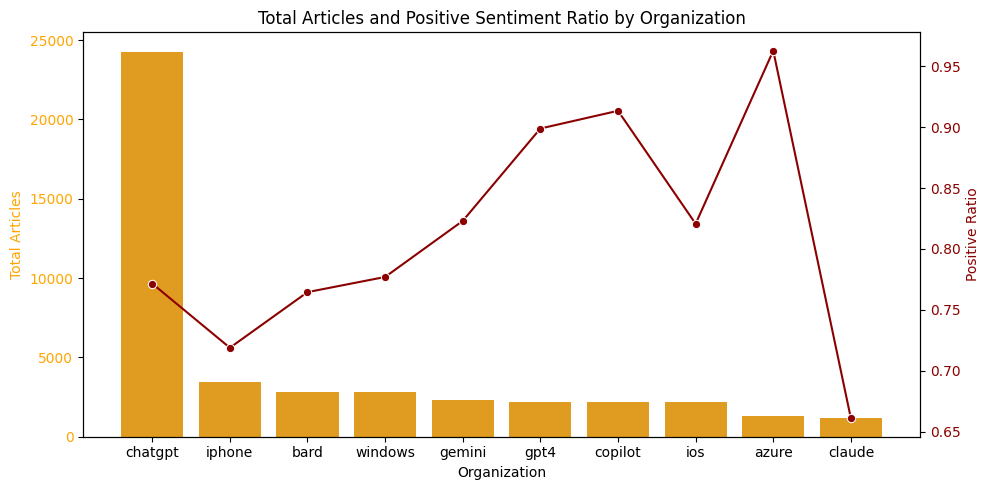

In [32]:
df = sentiment_summary_product.head(10)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for total
sns.barplot(x='normalized_products', y='total', data=df, ax=ax1, color='orange')
ax1.set_ylabel('Total Articles', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlabel('Organization')

# Line plot for positive ratio
ax2 = ax1.twinx()
sns.lineplot(x='normalized_products', y='positive_ratio', data=df, ax=ax2, color='darkred', marker='o')
ax2.set_ylabel('Positive Ratio', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Total Articles and Positive Sentiment Ratio by Organization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
sentiment_summary_product.reset_index(inplace=True)

In [40]:
sentiment_summary_product.head(13)

sentiment normalized_products  negative  positive  total  positive_ratio
0                     chatgpt      5543     18728  24271        0.771620
1                      iphone       968      2477   3445        0.719013
2                        bard       664      2157   2821        0.764622
3                     windows       628      2189   2817        0.777068
4                      gemini       407      1893   2300        0.823043
5                        gpt4       222      1971   2193        0.898769
6                     copilot       189      1991   2180        0.913303
7                         ios       387      1771   2158        0.820667
8                       azure        49      1260   1309        0.962567
9                      claude       409       798   1207        0.661143
10                      alexa       414       687   1101        0.623978
11              generative ai        15      1018   1033        0.985479
12                    android       182       743    925        0.803243

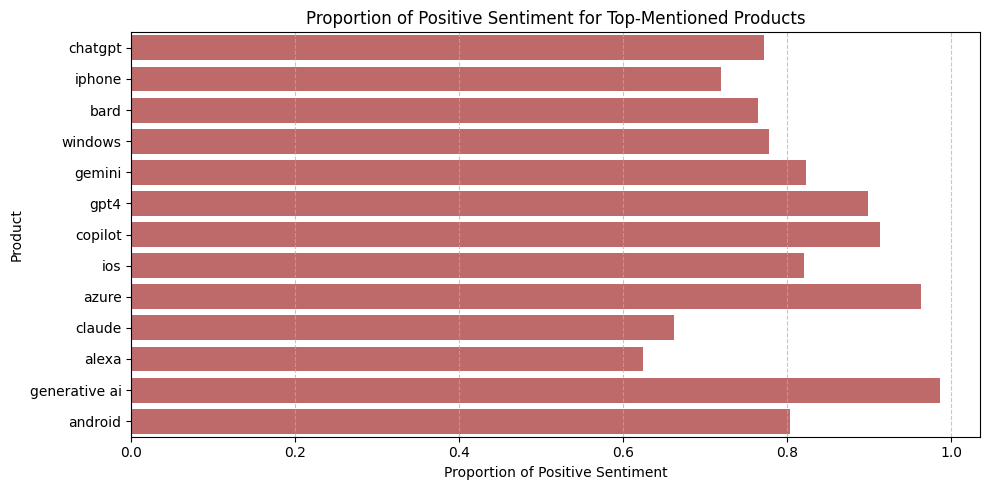

In [39]:
plot_sum = sentiment_summary_product.head(13)

plt.figure(figsize=(10, 5))
sns.barplot(y=plot_sum['normalized_products'], x=plot_sum['positive_ratio'], color='indianred')
plt.yticks(rotation=0)
plt.title("Proportion of Positive Sentiment for Top-Mentioned Products")
plt.xlabel("Proportion of Positive Sentiment")
plt.ylabel("Product")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
exploded_df = df_ai.explode('normalized_locations')

# Group by entity and sentiment
sentiment_summary_locations = (
    exploded_df.groupby('normalized_locations')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_locations['total'] = sentiment_summary_locations.sum(axis=1)
sentiment_summary_locations['positive_ratio'] = (
    sentiment_summary_locations.get('positive', 0) / sentiment_summary_locations['total']
)

# Optional: sort and view
sentiment_summary_locations = sentiment_summary_locations.sort_values(by='total', ascending=False)
print(sentiment_summary_locations.head(20))

sentiment             negative  positive  total  positive_ratio
normalized_locations                                           
us                        7229     22098  29327        0.753504
india                     1645      8422  10067        0.836595
china                     1695      5631   7326        0.768632
bahrain                    318      6893   7211        0.955901
dc                         541      6120   6661        0.918781
algeria                    136      6456   6592        0.979369
uk                        2145      4354   6499        0.669949
australia                  916      5463   6379        0.856404
california                1316      5008   6324        0.791904
new york                  1684      4212   5896        0.714383
calif                      123      4885   5008        0.975439
europe                     831      3876   4707        0.823454
uae                        413      4218   4631        0.910818
arkansas                   487      3939

In [42]:
df_ind = df_ai[df_ai['normalized_locations'].apply(lambda x: 'bahrain' in x)]
df_ind.sample(10)

url        date  \
26521   https://www.einpresswire.com/article/799452458...  2025-04-03   
21743   https://www.einpresswire.com/article/806036114...  2025-04-24   
11835   https://menafn.com/1108556171/Perimeter-Medica...  2024-08-14   
6748    https://menafn.com/1108808197/Portable-Analyti...  2024-10-23   
132570  https://www.einpresswire.com/article/600711773...  2022-11-12   
120904  https://menafn.com/1108756007/Composable-AI-Th...  2024-10-08   
138963  https://menafn.com/1108654299/User-Survey-Reve...  2024-09-09   
143329  https://menafn.com/1107265009/AI-Observability...  2023-10-18   
116017  https://menafn.com/1108729188/Perimeter-Medica...  2024-09-30   
166908  https://menafn.com/1108261137/Samsung-Levant-D...  2024-05-27   

                                              title_clean  \
26521   BTQ Technologies Corp. to Present at the AI Te...   
21743   State Bar of California admits it used AI to d...   
11835   Perimeter Medical Imaging AI Reports Second Qu...   
6748    Portable Analytical Instrument Market To Grow ...   
132570  Origence Announces Strategic Financial Investm...   
120904  Composable AI The Game-Changer Every Business ...   
138963  User Survey Reveals Top Use Cases On Uncensore...   
143329  AI Observability Leader Truera Achieves SOC 2 ...   
116017  Perimeter Medical Imaging AI Announces Closing...   
166908  Samsung Levant Delves into Beauty of Jordan wi...   

                                               text_clean  topic  \
26521   BTQ Technologies Corp. to Present at the AI Te...     69   
21743   State Bar of California admits it used AI to d...     24   
11835   News News by Industry News by Region American ...    257   
6748    News News by Industry News by Region American ...      5   
132570  Origence Announces Strategic Financial Investm...    111   
120904  News News by Industry News by Region American ...     53   
138963  News News by Industry News by Region American ...    270   
143329  News News by Industry News by Region American ...     81   
116017  News News by Industry News by Region American ...     76   
166908  News News by Industry News by Region American ...     12   

                       industry  \
26521                Technology   
21743                 Education   
11835   Finance & Stock Markets   
6748    Finance & Stock Markets   
132570               Technology   
120904      Business & Startups   
138963               Technology   
143329               Technology   
116017               Technology   
166908               Technology   

                                           Representation sentiment  \
26521   ['patent', 'uspto', 'awarded', 'jumptuit', 'in...  positive   
21743   ['students', 'cheating', 'exam', 'chatgpt', 'm...  positive   
11835   ['spectral', 'multisensor', 'msai', 'fiscal', ...  positive   
6748    ['usd', 'cagr', 'growth', 'projected', 'techna...  positive   
132570  ['partnership', 'biomet', 'zimmer', 'hss', 'bi...  positive   
120904  ['small', 'entrepreneurs', 'unlocking', 'ango'...  positive   
138963  ['whiskey', 'predictor', 'mortality', 'unite',...  positive   
143329  ['blinken', 'bigai', 'hiddenlayer', 'llms', 's...  positive   
116017  ['market', 'concertai', 'cell', 'nuance', 'dea...  positive   
166908  ['oppo', 'smartphone', 'oneplus', 'hohem', 'fo...  positive   

        sentiment_score                                               orgs  \
26521          0.957012         ['BTQ Technologies Corp.', 'Ethos', 'EIN']   
21743          0.955113  ['State Bar of California', 'EIN', 'Ethos', 'E...   
11835          0.964135  ['Perimeter Medical Imaging AI, Inc.', '4PC', ...   
6748           0.957519  ['Technavio', 'MENAFN-', 'toTechnavio', 'Agile...   
132570         0.960269                         ['Origence', 'EIN', 'EIN']   
120904         0.963089                              ['Haltia.AI', 'LEGO']   
138963         0.819461                                        ['MENAFN-']   
143329         0.954931  ['Truera', '

In [45]:
df_ind = df_ai[~df_ai['normalized_locations'].apply(lambda x: 'bahrain' in x)]
df_ind.shape

(173353, 17)

In [46]:
exploded_df = df_ind.explode('normalized_locations')

# Group by entity and sentiment
sentiment_summary_locations = (
    exploded_df.groupby('normalized_locations')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_locations['total'] = sentiment_summary_locations.sum(axis=1)
sentiment_summary_locations['positive_ratio'] = (
    sentiment_summary_locations.get('positive', 0) / sentiment_summary_locations['total']
)

# Optional: sort and view
sentiment_summary_locations = sentiment_summary_locations.sort_values(by='total', ascending=False)
print(sentiment_summary_locations.head(20))

sentiment             negative  positive  total  positive_ratio
normalized_locations                                           
us                        7138     16003  23141        0.691543
india                     1438      7776   9214        0.843933
china                     1677      5285   6962        0.759121
dc                         541      6113   6654        0.918696
uk                        2143      4135   6278        0.658649
new york                  1679      3905   5584        0.699319
calif                      123      4743   4866        0.974723
texas                     1344      2605   3949        0.659661
california                1313      2531   3844        0.658429
san francisco              681      3075   3756        0.818690
ukraine                   2009      1575   3584        0.439453
washington                1526      1988   3514        0.565737
russia                    1703      1334   3037        0.439249
canada                    1052      1944

In [48]:
sentiment_summary_locations.reset_index(inplace=True)

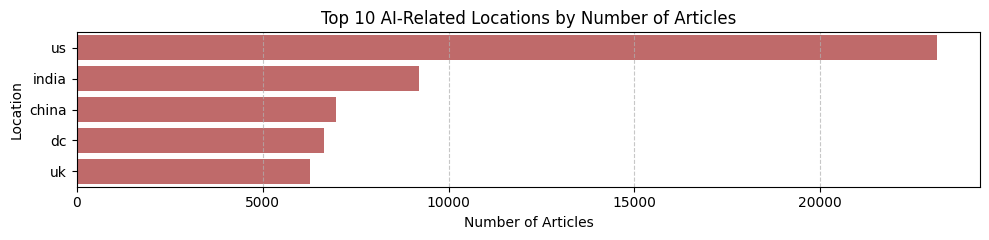

In [49]:
plot_sum = sentiment_summary_locations.head(5)

plt.figure(figsize=(10, 2.5))
sns.barplot(y=plot_sum['normalized_locations'], x=plot_sum['total'], color='indianred')
plt.yticks(rotation=0)
plt.title("Top 10 AI-Related Locations by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Location")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


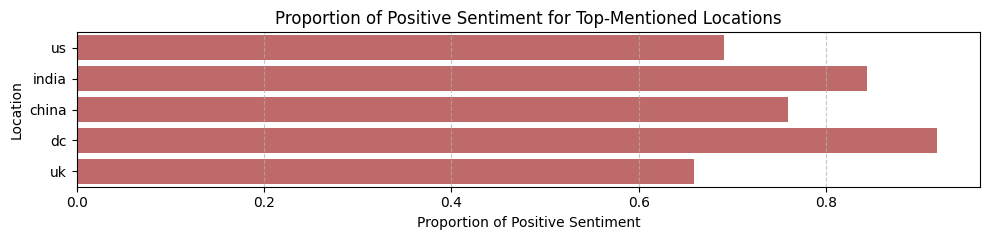

In [50]:
plot_sum = sentiment_summary_locations.head(5)

plt.figure(figsize=(10, 2.5))
sns.barplot(y=plot_sum['normalized_locations'], x=plot_sum['positive_ratio'], color='indianred')
plt.yticks(rotation=0)
plt.title("Proportion of Positive Sentiment for Top-Mentioned Locations")
plt.xlabel("Proportion of Positive Sentiment")
plt.ylabel("Location")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

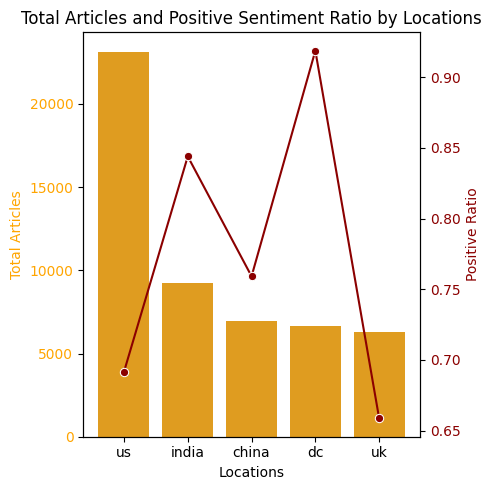

In [52]:
df = sentiment_summary_locations.head(5)

fig, ax1 = plt.subplots(figsize=(5, 5))

# Bar plot for total
sns.barplot(x='normalized_locations', y='total', data=df, ax=ax1, color='orange')
ax1.set_ylabel('Total Articles', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlabel('Locations')

# Line plot for positive ratio
ax2 = ax1.twinx()
sns.lineplot(x='normalized_locations', y='positive_ratio', data=df, ax=ax2, color='darkred', marker='o')
ax2.set_ylabel('Positive Ratio', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Total Articles and Positive Sentiment Ratio by Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
exploded_df = df_ai.explode('normalized_people')

# Group by entity and sentiment
sentiment_summary_people = (
    exploded_df.groupby('normalized_people')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_people['total'] = sentiment_summary_people.sum(axis=1)
sentiment_summary_people['positive_ratio'] = (
    sentiment_summary_people.get('positive', 0) / sentiment_summary_people['total']
)

# Optional: sort and view
sentiment_summary_people = sentiment_summary_people.sort_values(by='total', ascending=False)
print(sentiment_summary_people.head(20))

sentiment                 negative  positive  total  positive_ratio
normalized_people                                                  
sam altman                    1107      3125   4232        0.738422
elon musk                     1239      1991   3230        0.616409
trump                         1284      1139   2423        0.470078
biden                          822      1372   2194        0.625342
phil mackintosh                109      1963   2072        0.947394
altman                         533      1428   1961        0.728200
musk                           622      1036   1658        0.624849
donald trump                   637       673   1310        0.513740
joe biden                      340       856   1196        0.715719
satya nadella                  109       715    824        0.867718
sundar pichai                  111       630    741        0.850202
greta van susterencircle         0       738    738        1.000000
mark zuckerberg                114       578    

In [54]:
sentiment_summary_people.reset_index(inplace=True)
combine_map = {
    'sam altman': 'sam altman',
    'altman': 'sam altman',
    'elon musk': 'elon musk',
    'musk': 'elon musk',
    'trump': 'donald trump',
    'donald trump': 'donald trump',
    'biden': 'joe biden',
    'joe biden': 'joe biden',
    'phil mackintosh': 'phil mackintosh',
    'satya nadella': 'satya nadella'
}
sentiment_summary_people['people'] = sentiment_summary_people['normalized_people'].map(combine_map).fillna(sentiment_summary_people['normalized_people'])
summary_people = sentiment_summary_people.groupby('people')[['negative', 'positive']].sum().reset_index()
summary_people['total'] = summary_people['negative'] + summary_people['positive']
summary_people['positive_ratio'] = summary_people['positive'] / summary_people['total']
summary_people = summary_people.sort_values(by='total', ascending=False).reset_index(drop=True)

summary_people

sentiment           people  negative  positive  total  positive_ratio
0               sam altman      1640      4553   6193        0.735185
1                elon musk      1861      3027   4888        0.619272
2             donald trump      1921      1812   3733        0.485400
3                joe biden      1162      2228   3390        0.657227
4          phil mackintosh       109      1963   2072        0.947394
...                    ...       ...       ...    ...             ...
99241      joyce lee seoul         0         1      1        1.000000
99242         joyce millet         0         1      1        1.000000
99243        joyce mogtari         0         1      1        1.000000
99244       joyce randolph         1         0      1        0.000000
99245          joyce cheng         0         1      1        1.000000

[99246 rows x 5 columns]

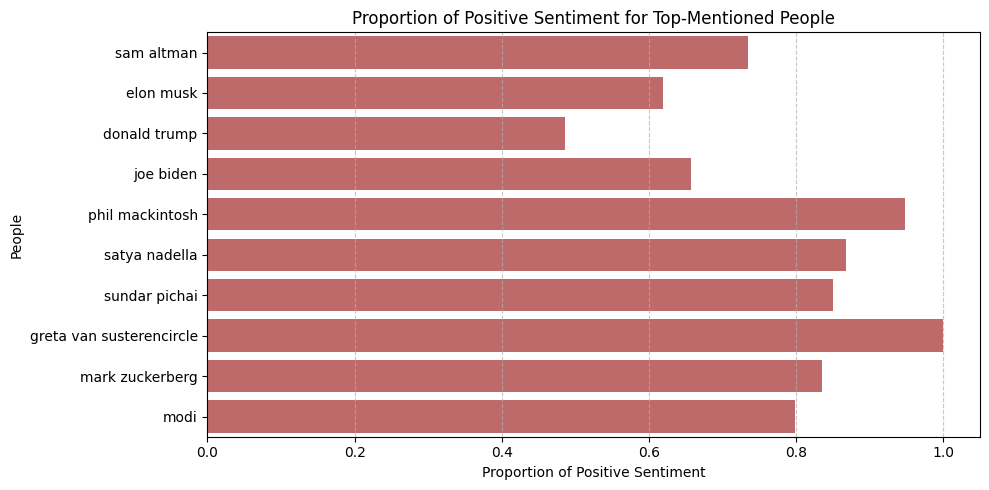

In [56]:
plot_sum = summary_people.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=plot_sum['people'], x=plot_sum['positive_ratio'], color='indianred')
plt.yticks(rotation=0)
plt.title("Proportion of Positive Sentiment for Top-Mentioned People")
plt.xlabel("Proportion of Positive Sentiment")
plt.ylabel("People")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
df_ind = df_ai[df_ai['normalized_people'].apply(lambda x: 'joe biden' in x)]
df_ind.sample(10)

url        date  \
83950   https://www.onenewspage.com/n/World/1zplp44gfu...  2023-05-17   
48745   https://www.business-standard.com/world-news/u...  2023-04-04   
46103   https://toronto.citynews.ca/2024/02/26/politic...  2024-02-26   
43476   https://www.armytimes.com/veterans/2023/10/31/...  2023-10-31   
134680  https://wtop.com/business-finance/2024/09/top-...  2024-09-16   
34427   https://www.kait8.com/2023/06/20/biden-will-ho...  2023-06-20   
146996  https://www.canindia.com/openai-ceo-sam-altman...  2023-07-04   
132163  https://news.yahoo.com/us-air-force-says-did-1...  2023-06-02   
57919   https://english.jagran.com/technology/chatgpt-...  2023-02-20   
6714    https://www.wsbtv.com/news/technology/china-us...  2024-05-13   

                                              title_clean  \
83950   OpenAI CEO Sam Altman Testifies in Congress He...   
48745   US President Biden to meet with experts on AI ...   
46103   Political consultant behind fake Biden robocal...   
43476   VA to launch artificial intelligence contest t...   
134680  Top AI business leaders meet with Biden admini...   
34427   Biden will host a forum about artificial intel...   
146996  OpenAI CEO Sam Altman asks US to reform high-s...   
132163  US Air Force says it did not run simulation in...   
57919   ChatGPT Terms Elon Musk And Other Public Figur...   
6714    China and US envoys will hold first top-level ...   

                                               text_clean  topic  \
83950   Editions Global United Kingdom India News Fron...      6   
48745   Market Opinion India News Industry News Sports...    196   
46103   s the Digital Advertising Alliance principles....    256   
43476   Now(Opens in new window)NewsYour ArmyAir Force...     17   
134680  print WASHINGTON (AP) Top Biden administration...     49   
34427   K8 News LiveK8 Digital AppsSubmit a News TipTa...     49   
146996  innovation at scale. Altman, who visited India...      6   
132163  US Air Force says it did not run simulation in...    136   
57919   Boss RepliedThe table also houses the name of ...     10   
6714    Sign-up(Opens in new window)Back 2 SchoolWeath...    218   

                      industry  \
83950               Technology   
48745   Employment & Workforce   
46103      Government & Policy   
43476               Healthcare   
134680     Government & Policy   
34427      Government & Policy   
146996              Technology   
132163              Technology   
57919      Business & Startups   
6714                Technology   

                                           Representation sentiment  \
83950   ['altman', 'openai', 'days', 'fired', 'candor'...  negative   
48745   ['harris', 'ceos', 'risks', 'pega', 'hundreds'...  positive   
46103   ['robocalls', 'ads', 'disclose', 'mandarin', '...  negative   
43476   ['scribe', 'improve', 'rhythmx', 'aidoc', 'hea...  positive   
134680  ['summit', 'modi', 'paris', 'bletchley', 'foru...  positive   
34427   ['summit', 'modi', 'paris', 'bletchley', 'foru...  positive   
146996  ['altman', 'openai', 'days', 'fired', 'candor'...  positive   
132163  ['drones', 'quadcopter', 'wingman', 'beaten', ...  negative   
57919   ['truthgpt', 'lawsuit', 'profit', 'altman', 'n...  positive   
6714    ['curb', 'package', 'storis', 'workflows', 'er...  positive   

        sentiment_score                                               orgs  \
83950          0.067296  ['NFL', 'MLS', 'NBA', 'NHL', 'NCAA Football', ...   
48745          0.942624                    ['The White House', 'Congress']   
46103          0.203173                                        ['YouTube']   
43476          0.941008                                                 []   
134680         0.940622  ['OpenAI', 'Nvidia', 'Microsoft', 'White House...   
34427          0.957165  ['K8 News LiveK8', 'KAITAbout', 'TeamKAIT', 'C...   
146996         0.928418  ['Twitter', 'Dazeinfo', 'Xillion', 'The State ...   
132163         0.388455  ['US Air Force', 'Air F

In [59]:
pd.set_option('display.max_colwidth', 150)
df_ind['title_clean'].sample(10)

146996                                                                           OpenAI CEO Sam Altman asks US to reform high-skill immigration
86777                                                                           U.S. gathers to talk AI safety, Trump vows to undo Biden's work
77392                                                                                         US cites 'misuse' of AI by China and others in...
155826                                        US gathers allies to talk AI safety. Trump's vow to undo Biden's AI policy overshadows their work
99443                                                                                           G7 to agree on AI code of conduct for companies
52270                                                                                       The inside story of ChatGPT's astonishing potential
91986                                                                                  Biden to meet with experts on AI risks and opportunities
135087    How President Biden's Executive Order On Safe, Secure, And Trustworthy Artificial Intelligence Addresses Health Care - New Technology
28873                                        Amazon, Google, Meta, Microsoft and other tech firms agree to AI safeguards set by the White House
165488                                           Biden will host a forum about artificial intelligence with technology leaders in San Francisco
Name: title_clean, dtype: object

In [60]:
df_ind = df_ai[df_ai['industry']=='Media & Entertainment']

In [61]:
exploded_df = df_ind.explode('normalized_products')

# Group by entity and sentiment
sentiment_summary_product = (
    exploded_df.groupby('normalized_products')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_product['total'] = sentiment_summary_product.sum(axis=1)
sentiment_summary_product['positive_ratio'] = (
    sentiment_summary_product.get('positive', 0) / sentiment_summary_product['total']
)

# Optional: sort and view
sentiment_summary_product = sentiment_summary_product.sort_values(by='total', ascending=False)
print(sentiment_summary_product.head(20))

sentiment            negative  positive  total  positive_ratio
normalized_products                                           
chatgpt                   184       558    742        0.752022
bard                       87        81    168        0.482143
windows                    21       122    143        0.853147
steamdb                   118         4    122        0.032787
ios                        24        84    108        0.777778
copilot                     6        97    103        0.941748
iphone                     40        51     91        0.560440
conversational ai           0        86     86        1.000000
claude                     28        40     68        0.588235
midjourney                 38        30     68        0.441176
generative ai               2        66     68        0.970588
gpt4                       11        46     57        0.807018
calculator                 51         2     53        0.037736
xbox                       21        27     48        0

In [63]:
exploded_df = df_ind.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(20))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
openai                104       456    560        0.814286
google                132       428    560        0.764286
apple                 140       267    407        0.656020
microsoft              67       333    400        0.832500
youtube               112       274    386        0.709845
facebook              100       105    205        0.512195
getty images           89        95    184        0.516304
beatles               114        58    172        0.337209
ap                     71       100    171        0.584795
amazon                 53       114    167        0.682635
twitter                97        66    163        0.404908
nfl                   134        24    158        0.151899
meta                   33       110    143        0.769231
steam                 131        11    142        0.077465
netflix                96        43    139        0.3093

In [65]:
print(sentiment_summary.head(30))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
openai                104       456    560        0.814286
google                132       428    560        0.764286
apple                 140       267    407        0.656020
microsoft              67       333    400        0.832500
youtube               112       274    386        0.709845
facebook              100       105    205        0.512195
getty images           89        95    184        0.516304
beatles               114        58    172        0.337209
ap                     71       100    171        0.584795
amazon                 53       114    167        0.682635
twitter                97        66    163        0.404908
nfl                   134        24    158        0.151899
meta                   33       110    143        0.769231
steam                 131        11    142        0.077465
netflix                96        43    139        0.3093

In [67]:
sentiment_summary.reset_index(inplace=True)

In [68]:
df_plot = sentiment_summary[sentiment_summary['normalized_orgs'].isin(['disney','netflix'])]

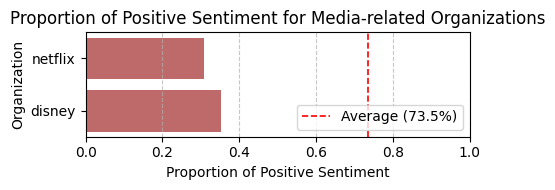

In [74]:

plt.figure(figsize=(5, 2))
sns.barplot(y=df_plot['normalized_orgs'], x=df_plot['positive_ratio'], color='indianred')
plt.axvline(0.735, color='red', linestyle='--', linewidth=1.2, label='Average (73.5%)')
plt.yticks(rotation=0)
plt.title("Proportion of Positive Sentiment for Media-related Organizations")
plt.xlabel("Proportion of Positive Sentiment")
plt.ylabel("Organization")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [66]:
df_inves= df_ind[df_ind['normalized_orgs'].apply(lambda x: 'netflix' in x)]
df_inves.sample(10)

url  \
133104                                                         https://www.digitaltrends.com/movies/secret-invasion-ai-used-to-create-opening-credits/   
54505                                                             https://mobilegamer.biz/how-king-is-using-ai-to-make-candy-crush-saga-even-stickier/   
16507                                        https://www.wionews.com/entertainment/hollywood-strikes-inflamed-by-claim-ai-could-do-writers-jobs-589920   
107254                                                                    https://www.pocketgamer.biz/news/80924/kwalee-bring-ai-into-game-production/   
82558                                           https://www.odt.co.nz/entertainment/television/new-black-mirror-season-tackles-actors-anxiety-about-ai   
158059                     https://www.deccanherald.com/entertainment/actors-hollywood-studios-still-at-odds-on-ai-and-other-issues-union-says-2753107   
28395                                                                     https://www.looper.com/1420587/disney-prom-pact-ai-extras-twitter-reactions/   
28143                                         https://news.abs-cbn.com/spotlight/05/07/23/hollywood-strikes-inflamed-by-claim-ai-could-do-writers-jobs   
100869  https://www.animenewsnetwork.com/news/2025-01-23/shogakukan-releases-novelous-light-novel-manga-app-using-ai-translation-in-u.s-canada/.220391   
159294                                                            https://qazinform.com/news/netflix-and-youtube-roll-out-new-smart-ai-features-07b896   

              date  \
133104  2023-06-21   
54505   2023-10-27   
16507   2023-05-07   
107254  2023-02-23   
82558   2023-06-18   
158059  2023-11-02   
28395   2023-10-15   
28143   2023-05-07   
100869  2025-01-23   
159294  2025-04-14   

                                                                                             title_clean  \
133104                     Marvel used AI to create Secret Invasion's opening credits and it looks awful   
54505                                        How King is using AI to make Candy Crush Saga even stickier   
16507                                      Hollywood strikes inflamed by claim AI could do writers' jobs   
107254                                           Kwalee bring AI into game production - Pocket Gamer.biz   
82558             New Black Mirror season tackles actors' anxiety about AI Otago Daily Times Online News   
158059                        Actors, Hollywood studios still at odds on AI and other issues, union says   
28395                     Disney's Prom Pact Caught Appearing To Use Creepy AI Extras Twitter Cries Foul   
28143                                      Hollywood strikes inflamed by claim AI could do writers' jobs   
100869  Shogakukan Releases 'Novelous' Light Novel Manga App Using AI Translation in U.S., Canada - News   
159294                                                Netflix and YouTube roll out new smart AI features   

                                                                                                                                                   text_clean  \
133104  Guides Best New Movies Best New Shows Best Shows on Netflix Best Movies on Netflix Best Shows on Disney Plus Best Movies on Disney Plus Best Shows...   
54505   About Advertise How King is using AI to make Candy Crush Saga even stickierBy Neil Long 26th October 2023 Even the tiniest tweak in a game the siz...   
16507   Hollywood strikes inflamed by claim AI could do writers' jobs - Entertainment NewsvideosGravitasWorldMY CommunityLIVE TVWorldCentral AsiaWest Asia...   
107254  International Asia Women In Games Countdown to PGC Seattle Features Articles Opinion Latest Popular Regulars Features Comment Opinion Everything e...   
82558   News Dunedin DCC Crime Campus Health The Star The South Today National The Star International Opinion Editorial Opinion 100 years ago Southern Say...   
158059  entertainmentActors, Hollywood studios still a

In [75]:
df_ind = df_ai[df_ai['industry']=='Employment & Workforce']

In [79]:
exploded_df = df_ind.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(20))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
google                175       574    749        0.766355
openai                147       588    735        0.800000
microsoft              97       435    532        0.817669
linkedin              143       283    426        0.664319
apple                 153       267    420        0.635714
facebook              144       178    322        0.552795
npr                   214        45    259        0.173745
ap                     60       174    234        0.743590
getty images           66       160    226        0.707965
youtube               153        71    224        0.316964
amazon                 75       144    219        0.657534
npr news              197        20    217        0.092166
meta                   42       168    210        0.800000
reuters                45       148    193        0.766839
fcc                   127        60    187        0.3208

In [84]:
df_inves= df_ind[df_ind['normalized_orgs'].apply(lambda x: 'linkedin' in x)]
df_inves.sample(10)

url  \
24243                                                               https://www.housingwire.com/articles/will-ai-replace-mortgage-jobs-not-exactly-execs-say/   
62456                                                                       https://www.phoneworld.com.pk/baidu-ernie-x1-chinas-relentless-ai-push-continues/   
133866                                                          https://www.socialmediatoday.com/news/linkedin-launches-live-test-generative-ai-posts/653748/   
82666          https://www.business-standard.com/amp/industry/news/say-goodbye-to-9-to-5-jobs-linkedin-co-founder-latest-prediction-on-ai-124072601001_1.html   
150909  https://www.iol.co.za/weekend-argus/news/cape-town-hosts-global-conference-on-navigating-ai-and-the-future-of-education-f8653c83-a35a-4ee1-9689-4e...   
22462                                    https://www.afaqs.com/news/mktg/94-of-b2b-marketers-in-india-see-ai-boosting-roi-despite-challenges-linkedin-8735364   
41804                                                 https://www.businessinsider.com/openai-chatgpt-white-collar-work-productivity-perform-worse-jobs-2023-9   
93058          https://www.newschannel10.com/prnewswire/2023/11/21/mit-technology-review-announces-special-linkedin-live-event-chaos-openai-what-it-means-ai/   
177970                  https://www.koaa.com/science-and-tech/artificial-intelligence/microsoft-report-shows-employees-are-using-ai-in-the-workplace-at-large   
36027                                                                   https://www.businessinsider.com/40-decided-retrain-coder-ride-ai-wave-careers-2023-12   

              date  \
24243   2024-06-05   
62456   2025-03-17   
133866  2023-06-23   
82666   2024-07-26   
150909  2024-03-02   
22462   2025-02-19   
41804   2023-10-02   
93058   2023-11-21   
177970  2024-05-09   
36027   2023-12-03   

                                                                                                   title_clean  \
24243                                                    Will AI replace mortgage jobs? Not exactly, execs say   
62456                                                      Baidu Ernie X1 China s Relentless AI Push Continues   
133866                                                      LinkedIn Launches Live Test of Generative AI Posts   
82666                          'Say goodbye to 9-to-5 jobs' LinkedIn co-founder latest prediction on AI - News   
150909                          Cape Town hosts global conference on navigating AI and the future of education   
22462                             94 of B2B marketers in India see AI boosting ROI despite challenges LinkedIn   
41804                                                 OpenAI's ChatGPT Can Actually Make Workers Perform Worse   
93058   MIT Technology Review Announces Special LinkedIn Live Event Chaos at OpenAI - and what it means for AI   
177970                                 Microsoft report shows employees are using AI in the workplace at large   
36027                                           I'm 40 and Retraining As a Coder to Stay on Top of the AI Wave   

                                                                                                                                                   text_clean  \
24243   Marketing Services Product Guides White Papers Videos Awards and Rankings Nominate for Awards TECH100 Finance Leaders Rising Stars Marketing Leade...   
62456   News Devices Apps Games Telecom International Reviews Best Of Android iPhone Internet PC How To Packages Call Jazz Call Packages Telenor Call Pack...   
133866  Launches Live Test of Generative AI Posts Published June 23, 2023 By Andrew Hutchinson Content and Social Media Manager While I get that AI conten...   
82666   EconomyFinancePersonal FinanceWorld NewsLatestE-paperToday's PaperMarketsOlympics 2024OpinionIndia Morning ShowThe Banking ShowVideo GalleryPhoto ...   
150909  pingEntertainmentAll OnBooksRoyalsTVSportAll SportSoccerSoccer StarCape

In [77]:
exploded_df = df_ind.explode('normalized_products')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_products')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(20))

sentiment            negative  positive  total  positive_ratio
normalized_products                                           
chatgpt                   226       836   1062        0.787194
claude                    140        81    221        0.366516
iphone                     55        53    108        0.490741
windows                    34        63     97        0.649485
ios                        32        50     82        0.609756
gpt4                        8        72     80        0.900000
dalle                      18        56     74        0.756757
midjourney                 28        43     71        0.605634
alexa                      29        36     65        0.553846
copilot                    10        48     58        0.827586
generative ai               0        52     52        1.000000
bard                        7        45     52        0.865385
stable diffusion            9        33     42        0.785714
azure                       1        39     40        0

In [78]:
df_inves= df_ind[df_ind['normalized_products'].apply(lambda x: 'generative ai' in x)]
df_inves.sample(10)

url  \
147994                            https://www.wlox.com/prnewswire/2023/05/02/appian-infuses-process-automation-with-artificial-intelligence/   
129703                                                                                                  https://scale.com/careers/4373354005   
88009                           https://www.wjhg.com/prnewswire/2023/05/09/ascendant-art-launches-ai-avatar-app-that-pays-royalties-artists/   
33160                            https://www.newsbytesapp.com/news/science/generative-ai-will-reduce-46-time-spent-on-accounting-tasks/story   
37620                   https://www.valleynewslive.com/prnewswire/2023/05/10/new-ai-avatar-app-first-compensate-artists-use-trained-artwork/   
73423                                    https://betanews.com/2023/07/25/updated-ai-engine-aims-to-boost-productivity-across-business-teams/   
32245                            https://www.wdbj7.com/prnewswire/2023/05/02/appian-infuses-process-automation-with-artificial-intelligence/   
94569                                                        https://www.efinancialcareers.com/news/citi-generative-ai-in-investment-banking   
177119                          https://www.wsaw.com/prnewswire/2023/05/09/ascendant-art-launches-ai-avatar-app-that-pays-royalties-artists/   
40462   https://www.lokmattimes.com/business/everseai-launches-cowgpt-worlds-first-generative-ai-application-built-for-dairy-veterinary-and/   

              date  \
147994  2023-05-02   
129703  2024-02-24   
88009   2023-05-09   
33160   2023-11-27   
37620   2023-05-10   
73423   2023-07-25   
32245   2023-05-02   
94569   2024-03-05   
177119  2023-05-09   
40462   2023-12-22   

                                                                                                                     title_clean  \
147994                                                            Appian Infuses Process Automation with Artificial Intelligence   
129703                                                  Senior Staff Machine Learning Research Engineer, Generative AI - Careers   
88009                                                        Ascendant Art Launches AI Avatar App That Pays Royalties to Artists   
33160                                                                   By 2032, AI will reduce accounting workload by nearly 50   
37620                                                   New AI Avatar App First to Compensate Artists For Use of Trained Artwork   
73423                                                         Updated AI engine aims to boost productivity across business teams   
32245                                                             Appian Infuses Process Automation with Artificial Intelligence   
94569                                                         Citi offering 300k salaries for new Generative AI team in New York   
177119                                                       Ascendant Art Launches AI Avatar App That Pays Royalties to Artists   
40462   eVerse.AI launches CowGPT World's first Generative AI application built for Dairy, Veterinary and Animal husbandry space   

                                                                                                                                                   text_clean  \
147994  Creative ServicesAppsContestsWLOX HistoryWeatherWeather BlogRadarSevere Weather AlertsClosingsHurricane CenterWLOX First Alert Weather AppProgramm...   
129703  ProductsScale Data EngineAnnotate, curate, and collect dataGenerative AI RLHFPower generative AI modelsTest EvaluationSafe, Secure Deployment of L...   
88009   LiveWeatherClosings DelaysFish Game ForecastMap RoomLive Doppler RadarWeather CamerasWildfire ForecastTropics HeadlinesSportsFriday Night Overtime...   
33160   News Technology News By 2032, AI will reduce accounting workload by nearly 50 By 2032, AI will reduce accounting workload by nearly 50 1 4 Technol...   
37620   Valley News Live JobsMeet the Sales TeamInv

In [85]:
exploded_df = df_ai.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(20))

sentiment                       negative  positive  total  positive_ratio
normalized_orgs                                                          
openai                              3838     15885  19723        0.805405
google                              3397     14619  18016        0.811445
microsoft                           2055     11395  13450        0.847212
apple                               2261      8295  10556        0.785809
nvidia                               449      5390   5839        0.923103
amazon                              1152      4434   5586        0.793770
meta                                 631      4129   4760        0.867437
facebook                            1680      2647   4327        0.611740
linkedin                            1553      2409   3962        0.608026
youtube                             1832      1919   3751        0.511597
nasdaq                               327      3364   3691        0.911406
reuters                              6

In [87]:
sentiment_summary.reset_index(inplace=True)
df_plot = sentiment_summary[sentiment_summary['normalized_orgs'].isin(['disney','netflix','linkedin'])]

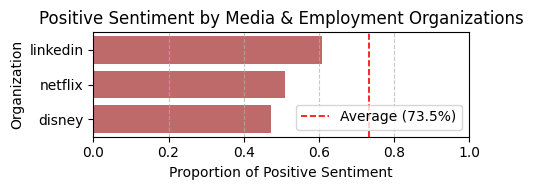

In [88]:

plt.figure(figsize=(5, 2))
sns.barplot(y=df_plot['normalized_orgs'], x=df_plot['positive_ratio'], color='indianred')
plt.axvline(0.735, color='red', linestyle='--', linewidth=1.2, label='Average (73.5%)')
plt.yticks(rotation=0)
plt.title("Positive Sentiment by Media & Employment Organizations")
plt.xlabel("Proportion of Positive Sentiment")
plt.ylabel("Organization")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.xlim(0,1)
plt.tight_layout()
plt.show()